In [781]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from matplotlib.ticker import FuncFormatter

sns.set(style='whitegrid')

%matplotlib inline

In [311]:
df_sales = pd.read_csv('source/sales.csv', parse_dates=['DATE_ORDER'])
df_comp = pd.read_csv('source/comp_prices.csv', parse_dates=['DATE_EXTRACTION'])

In [3]:
print(f'Total Sales: {df_sales.shape[0]}')
print(f'Total Competitor Price: {df_comp.shape[0]}')

Total Sales: 351091
Total Competitor Price: 50114


In [312]:
df_sales['YEAR'] = df_sales['DATE_ORDER'].dt.year
df_sales['MONTH'] = df_sales['DATE_ORDER'].dt.month
df_sales['DAY'] = df_sales['DATE_ORDER'].dt.day
df_sales['WEEKDAY'] = df_sales['DATE_ORDER'].dt.weekday

df_comp['DATE'] = df_comp['DATE_EXTRACTION'].dt.date
df_comp['YEAR'] = df_comp['DATE_EXTRACTION'].dt.year
df_comp['MONTH'] = df_comp['DATE_EXTRACTION'].dt.month
df_comp['DAY'] = df_comp['DATE_EXTRACTION'].dt.day
df_comp['WEEKDAY'] = df_comp['DATE_EXTRACTION'].dt.weekday

In [5]:
df_sales['VL_UNIT'] = round(df_sales['REVENUE'] / df_sales['QTY_ORDER'], 2)

In [6]:
df_sales.set_index('DATE_ORDER', inplace=True)
df_comp.set_index('DATE_EXTRACTION', inplace=True)

In [7]:
df_sales.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-08-02,P6,1.0,1808.99,2015,8,2,6,1808.99
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00
2015-08-17,P6,1.0,1673.95,2015,8,17,0,1673.95
2015-08-11,P6,1.0,1674.00,2015,8,11,1,1674.00
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00


In [313]:
df_comp.head()

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
0,P6,2015-01-30 08:11:38,C3,1898.00,1,2015-01-30,2015,1,30,4
1,P6,2015-01-30 08:11:38,C1,1898.00,1,2015-01-30,2015,1,30,4
2,P6,2015-01-30 08:11:38,C6,1999.90,1,2015-01-30,2015,1,30,4
3,P6,2015-01-31 20:10:14,C2,1894.88,2,2015-01-31,2015,1,31,5
4,P6,2015-01-31 20:10:14,C3,1894.88,2,2015-01-31,2015,1,31,5


In [9]:
df_sales.dtypes

PROD_ID       object
QTY_ORDER    float64
REVENUE      float64
YEAR           int64
MONTH          int64
DAY            int64
WEEKDAY        int64
VL_UNIT      float64
dtype: object

In [10]:
df_comp.dtypes

PROD_ID              object
COMPETITOR           object
COMPETITOR_PRICE    float64
PAY_TYPE              int64
YEAR                  int64
MONTH                 int64
DAY                   int64
WEEKDAY               int64
dtype: object

In [11]:
df_sales.describe()

,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
count,351091.000000,351091.000000,351091.0,351091.000000,351091.000000,351091.000000,351091.000000
mean,1.078837,764.953615,2015.0,5.968669,15.420167,2.655015,712.347413
std,1.103650,781.957331,0.0,2.638461,8.946808,1.734857,197.892699
min,1.000000,229.000000,2015.0,1.000000,1.000000,0.000000,229.000000
25%,1.000000,649.000000,2015.0,4.000000,7.000000,1.000000,649.000000
50%,1.000000,749.000000,2015.0,6.000000,16.000000,2.000000,749.000000
75%,1.000000,799.000000,2015.0,8.000000,23.000000,4.000000,794.320000
max,500.000000,368750.000000,2015.0,10.000000,31.000000,6.000000,2599.000000


In [12]:
df_comp.describe()

,COMPETITOR_PRICE,PAY_TYPE,YEAR,MONTH,DAY,WEEKDAY
count,50114.000000,50114.000000,50114.0,50114.000000,50114.000000,50114.000000
mean,1111.281449,1.499701,2015.0,6.106018,15.486411,2.927026
std,3805.613500,0.500005,0.0,2.440813,8.767202,1.979078
min,359.100000,1.000000,2015.0,1.000000,1.000000,0.000000
25%,549.000000,1.000000,2015.0,4.000000,8.000000,1.000000
50%,799.000000,1.000000,2015.0,6.000000,15.000000,3.000000
75%,1359.000000,2.000000,2015.0,8.000000,23.000000,5.000000
max,149900.000000,2.000000,2015.0,10.000000,31.000000,6.000000


In [13]:
df_sales['PROD_ID'].sort_values().unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype=object)

In [14]:
df_comp['PROD_ID'].sort_values().unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype=object)

In [15]:
df_sales.nunique()

PROD_ID         9
QTY_ORDER      39
REVENUE      3078
YEAR            1
MONTH          10
DAY            31
WEEKDAY         7
VL_UNIT      2058
dtype: int64

In [16]:
df_comp.nunique()

PROD_ID                9
COMPETITOR             6
COMPETITOR_PRICE    2013
PAY_TYPE               2
YEAR                   1
MONTH                 10
DAY                   31
WEEKDAY                7
dtype: int64

In [17]:
df_sales.isnull().sum()

PROD_ID      0
QTY_ORDER    0
REVENUE      0
YEAR         0
MONTH        0
DAY          0
WEEKDAY      0
VL_UNIT      0
dtype: int64

In [18]:
df_comp.isnull().sum()

PROD_ID             0
COMPETITOR          0
COMPETITOR_PRICE    0
PAY_TYPE            0
YEAR                0
MONTH               0
DAY                 0
WEEKDAY             0
dtype: int64

In [19]:
df_sales.skew()

QTY_ORDER    278.768158
REVENUE      304.089991
YEAR           0.000000
MONTH         -0.260743
DAY           -0.051926
WEEKDAY        0.304711
VL_UNIT        1.765345
dtype: float64

In [20]:
df_sales.kurtosis()

QTY_ORDER    119971.632957
REVENUE      139996.717825
YEAR              0.000000
MONTH            -1.051368
DAY              -1.185817
WEEKDAY          -0.813706
VL_UNIT           8.953788
dtype: float64

# Methods

In [573]:
def y_fmt_frequency(tick_val, pos):
    if int(tick_val) > 1000000:
        val = int(tick_val) / 1000000
        return '%.1f M' % val
    elif int(tick_val) > 1000:
        val = int(tick_val) / 1000
        return '%.0f k' % val
    
    return '%.f' % tick_val

In [143]:
def y_fmt_value(tick_val, pos):
    if int(tick_val) > 1000000:
        val = int(tick_val) / 1000000
        return 'R$ %1.1f M' % val
    elif int(tick_val) > 1000:
        val = int(tick_val) / 1000
        return 'R$ %1.1f k' % val
    
    return 'R$ %.1f' % tick_val

In [555]:
def set_month(x):
    month = 'Dec'
    
    if x == 1:
        month = 'Jan'
    elif x == 2:
        month = 'Feb'
    elif x == 3:
        month = 'Mar'
    elif x == 4:
        month = 'Apr'
    elif x == 5:
        month = 'May'
    elif x == 6:
        month = 'Jun'
    elif x == 7:
        month = 'Jul'
    elif x == 8:
        month = 'Aug'
    elif x == 9:
        month = 'Sep'
    elif x == 10:
        month = 'Oct'
    elif x == 11:
        month = 'Nov'
    
    return month

In [737]:
def set_payment_type(x): 
    if x == 1:
        return f'Deferred Payment ({x})'
    else:
        return f'Immediate Payment ({x})'

# Exploratory Data Analysis

### 1. Revenue

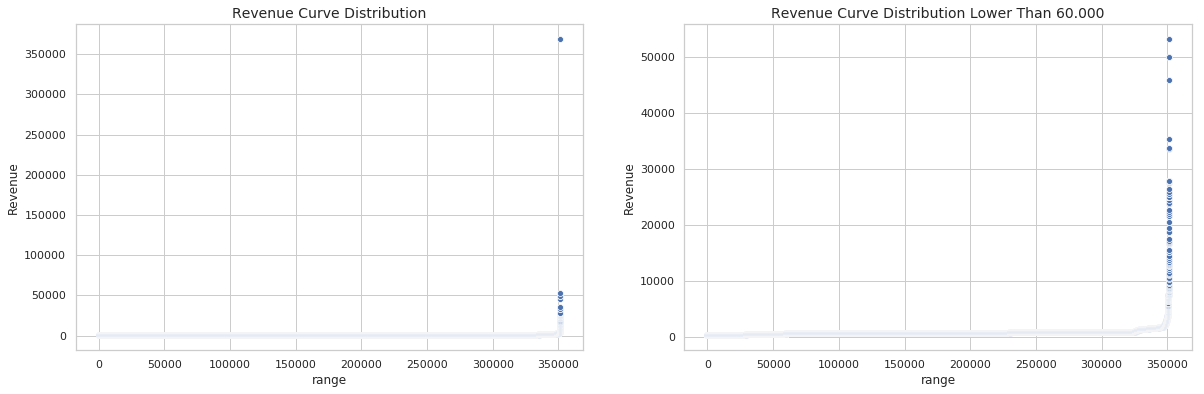

In [21]:
revenues = np.sort(df_sales.loc[df_sales['REVENUE'] < 60000, 'REVENUE'].values)

plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.scatterplot(
    x=range(df_sales.shape[0]),
    y=np.sort(df_sales['REVENUE'].values)
)

plt.title('Revenue Curve Distribution', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.subplot(122)
sns.scatterplot(
    x=range(len(revenues)),
    y=revenues
)

plt.title('Revenue Curve Distribution Lower Than 60.000', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.show()

**Revenue Curve Distribution**
- *Podemos observar um valor totalmente fora do normal em comparação as outras receitas*
- *A distância entre um valor e o anterior tem um salto de aproximadamente 56 mil para 360 mil.*

**Revenue Curve Distribution Lower Than Max Value**
- *No segundo gráfico podemos visualizar uma curva mais uniforme, sem muitos valores distantes comparados aos demais.*

/home/leonardo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


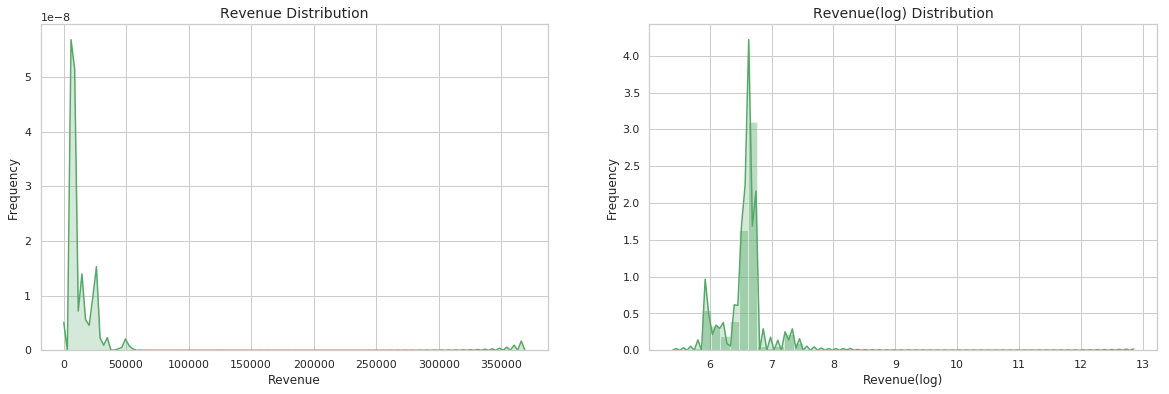

In [22]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.distplot(
    df_sales['REVENUE'],
    color='g', 
    hist=False, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution', fontsize=14)

plt.subplot(122)
sns.distplot(
    np.log(df_sales['REVENUE']),
    color='g', 
    hist=True, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue(log)')
plt.ylabel('Frequency')
plt.title('Revenue(log) Distribution', fontsize=14)

plt.show()

- Primeiro gráfico, skewness positivo. Enviesado para direita
- Utilização do log para a torno a distribuição menos enviesada.

(351091, 8)
(351090, 8)


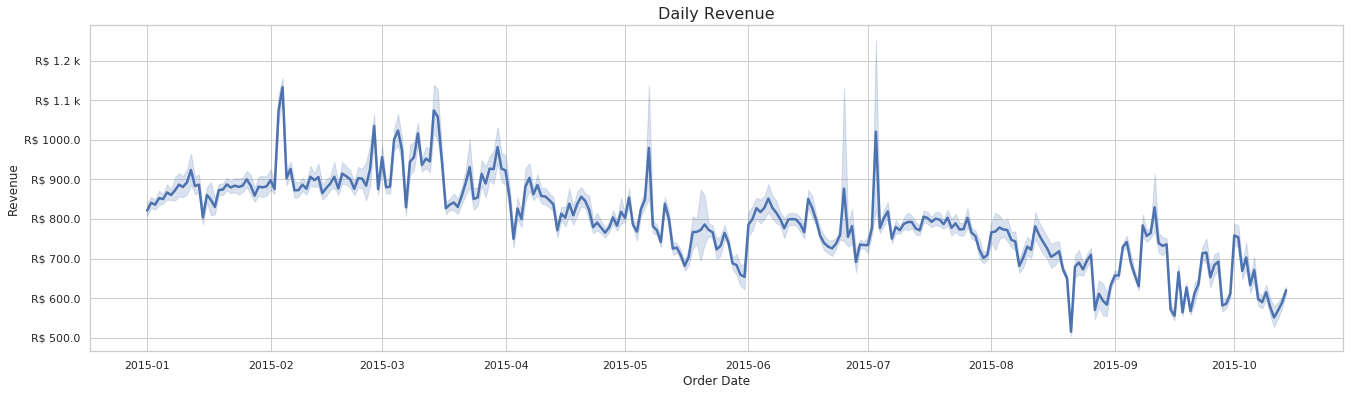

In [798]:
sales_with_outlier = df_sales
sales_no_outliers = df_sales[df_sales['REVENUE'] < 300000]

print(sales_with_outlier.shape)
print(sales_no_outliers.shape)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(
    x='DATE_ORDER', 
    y='REVENUE',
    data=sales_with_outlier,
    palette='tab10', 
    linewidth=2.5,
    ax=ax1
)
ax1.set_ylabel('Revenue')
ax1.set_xlabel('Order Date')
ax1.set_title('Daily Revenue', fontsize=16)

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

**Média**
- Podemos reparar picos de vendas em determinados pontos do gráfico, muitos deles estão concentrados entre o meio do mês anterior até o início do mês seguinte. Talvez por questões de recebimento de salário possa ser um dos fatores para estes eventos.

IndexError: invalid index

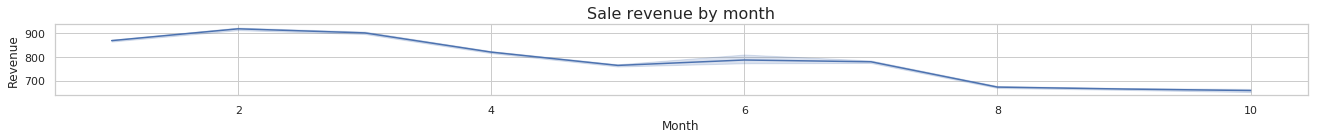

In [825]:
# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig = plt.figure(figsize=(20, 6))

grid = plt.GridSpec(4, 4)

plt.subplot(grid[0, 0:])
sns.lineplot(
    x='MONTH', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
#     ax=ax1
)
plt.title('Sale revenue by month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue')

# ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.subplot(grid[:0, 1])
sns.lineplot(
    x='DAY', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
#     ax=ax2
)
plt.title('Sale revenue by month', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Revenue')

# ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.subplot(grid[1, 0:])

sns.lineplot(
    x='WEEKDAY', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
)
plt.title('Sale revenue by month', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Revenue')

# ax3.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

# plt.subplot(222)
# sns.lineplot(
#     x=(df_sales['DAY'].values),
# #     y=round(df_sales['REVENUE'].sum(), 2), 
#     y=df_sales['REVENUE'], 
#     palette='tab10'
# )

# plt.title('Sale revenue by day', fontsize=16)

# plt.subplot(212)
# sns.lineplot(x='WEEKDAY', y='REVENUE', data=df_sales, palette='tab10')

# plt.title('Sale revenue by weekday', fontsize=16)

plt.show()

*Comments*

### 2. Products

In [25]:
df_sales.PROD_ID.value_counts()

P7    195939
P2     63358
P8     27840
P5     19775
P9     18431
P4     14656
P6      4102
P1      4091
P3      2899
Name: PROD_ID, dtype: int64

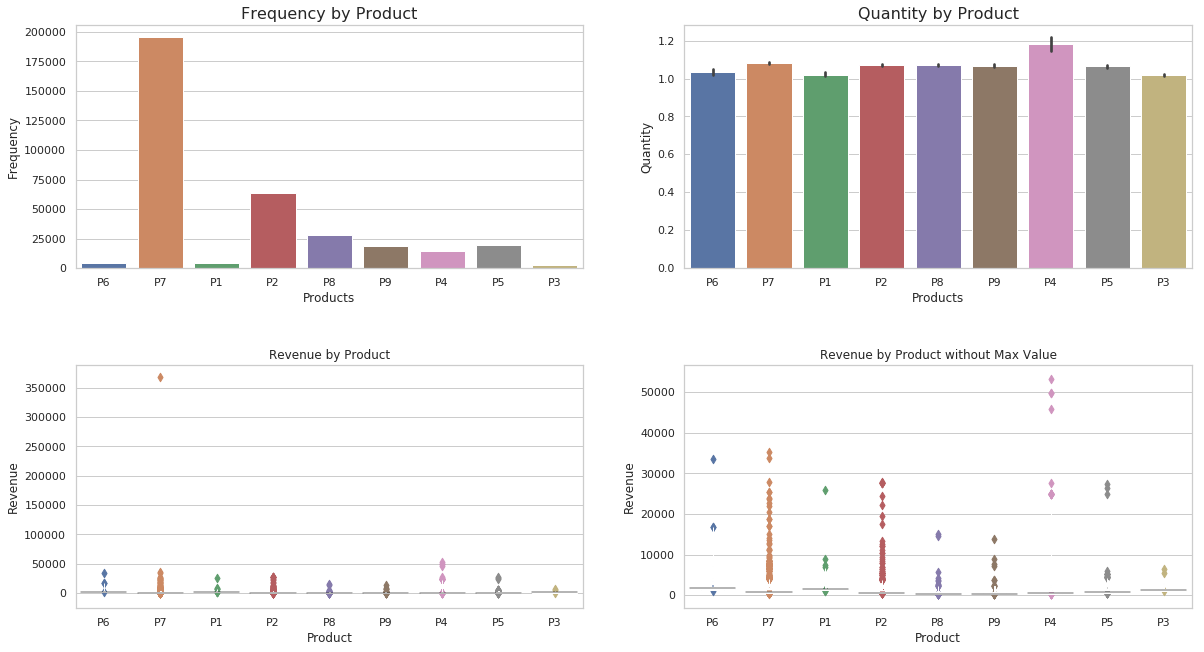

In [26]:
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, top=0.8)

plt.subplot(221)
sns.countplot(x='PROD_ID', data=df_sales)

plt.title('Frequency by Product', fontsize=16)
plt.xlabel('Products')
plt.ylabel('Frequency')

plt.subplot(222)
sns.barplot(x='PROD_ID', y='QTY_ORDER', data=df_sales)

plt.title('Quantity by Product', fontsize=16)
plt.xlabel('Products')
plt.ylabel('Quantity')

plt.subplot(223)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales)

plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

plt.subplot(224)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales[df_sales['REVENUE'] < df_sales['REVENUE'].max()])

plt.title('Revenue by Product without Max Value')
plt.xlabel('Product')
plt.ylabel('Revenue')

plt.show()

**Frequency by Product**
- Neste plot observamos que os produtos 7 e 2 possuem uma frequência maior em cada vendas no geral (não sendo considerado as suas respectivas quantidades vendidas).

**Quantity by Product**
- Neste gráfico analisamos a quantidade total vendida de cada produto em cada venda. Apesar dos produtos 7 e 2 terem mais frequências em cada venda realizada, os dados nos indicam que o produto 4 possui uma maior quantidade vendida. Mesmo que ele não tenha tanta frequência em muitas vendas, os clientes compram este produto em maior quantidade do que os outros produtos.

**Revenue by Product**
- Assim como no gráfico anterior o produto 7 continua tendo um destaque no valor da receita comparado aos outros produtos. Aqui visualizamos claramente que existe uma venda onde o valor do seu produto é muito superior aos outros, tornando assim essa diferença e a distância visualizada no gráfico.

**Revenue by Product without Max Value**
- Neste plot retiramos o valor da receita significativa do produto 7 para analisarmos melhor o comportamento dos outros produtos. Ao retirarmos podemos observar em um primeiro momento que o produto 4 possui um valor de receita significativo logo após o produto 7.
- Mesmo que o produto 4 esteja destacado em relação aos outros no gráfico, podemos observar que essa diferença depende da quantidade dos produtos vendidos em cada venda, pois os seus valores possuem uma distância entre eles.
- Já para o produto 7 vemos uma concentração muito próxima dos pontos, deixando a reta dos seus valores mais homogêneos do que o produto 4, se não tivermos uma quantidade significativa para o produto, o seu valor de receite tende a diminuir.
- O produto 2 também apresenta o mesmo comportamento do produto 7 sem o outlier, uma reta onde os seus pontos (valores) são mais próximos uns dos outros, tendo assim uma maior conscistência.


### 3. P1

In [27]:
df_sales_p1 = df_sales[df_sales['PROD_ID'] == 'P1']
df_sales_p1.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-27,P1,1.0,1490.17,2015,7,27,0,1490.17
2015-07-30,P1,1.0,1499.00,2015,7,30,3,1499.00
2015-07-28,P1,1.0,1499.00,2015,7,28,1,1499.00
2015-07-25,P1,1.0,1499.00,2015,7,25,5,1499.00
2015-07-29,P1,1.0,1499.00,2015,7,29,2,1499.00


Mean of revenue by month of P1:
MONTH
2     1520.643624
3     1415.883372
4     1449.256189
5     1428.343927
6     1457.955683
7     1503.004047
8     1508.453512
9     1516.348482
10    1547.157919
Name: REVENUE, dtype: float64

Distribution of quantity sold (P1):
QTY_ORDER
1.0     98.90
2.0      0.90
5.0      0.10
20.0     0.02
6.0      0.02
4.0      0.02
3.0      0.02
Name: PROD_ID, dtype: float64


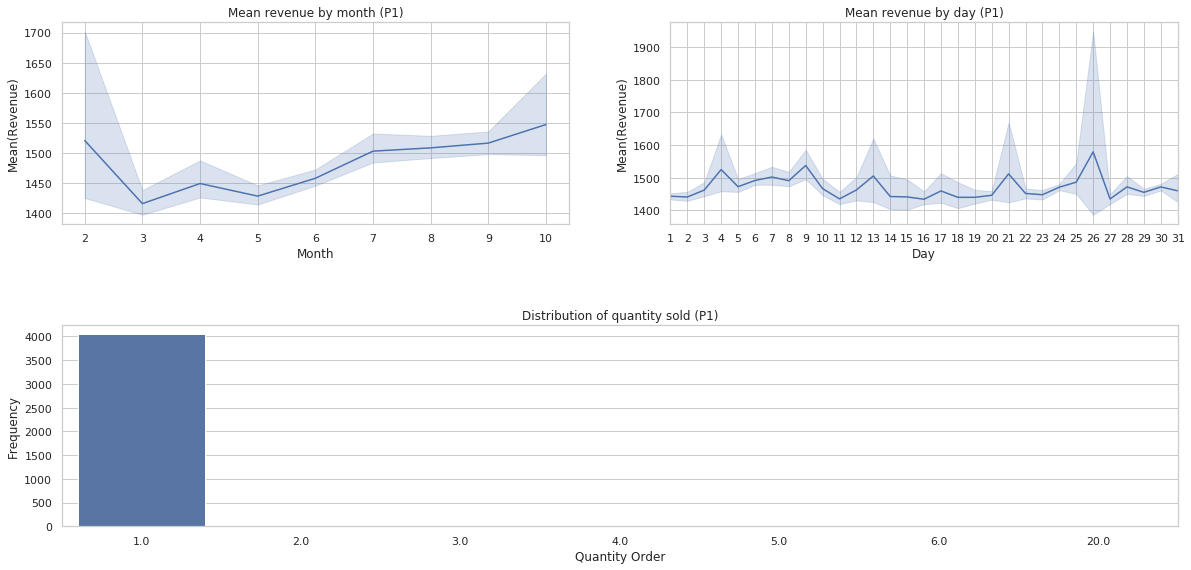

In [28]:
print('Mean of revenue by month of P1:')
print(df_sales_p1.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P1):')
print(
    round((df_sales_p1.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p1.QTY_ORDER.count()) * 100, 2).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p1)

plt.title('Mean revenue by month (P1)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p1)

x = (np.arange(df_sales_p1.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P1)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p1.DAY.max()))
plt.xticks(np.arange(df_sales_p1.DAY.max())+1, x)

plt.subplot(212)

sns.countplot(df_sales_p1['QTY_ORDER'])

plt.title('Distribution of quantity sold (P1)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P1)**
- Podemos observar uma queda na média das vendas a partir do mês de fevereiro e um crescimento a partir do mês de março.

**Mean revenue by day (P1)**
- Ao analisarmos o gráfico da média de receita por dia, vemos um pico na receita no final do mês.

**Distribution of quantity sold (P1)**
- Na análise da distribuição da quantidade vendida, podemos observar que 99% das vendas do produto P1 os clientes compram apenas 1 unidade.

### 4. P2

In [29]:
df_sales_p2 = df_sales[df_sales['PROD_ID'] == 'P2']
df_sales_p2.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-06-23,P2,1.0,649.00,2015,6,23,1,649.00
2015-07-29,P2,1.0,664.05,2015,7,29,2,664.05
2015-07-31,P2,1.0,664.05,2015,7,31,4,664.05
2015-07-31,P2,1.0,664.05,2015,7,31,4,664.05
2015-09-04,P2,1.0,658.99,2015,9,4,4,658.99


Mean of revenue by month of P2:
MONTH
1     820.525198
2     844.312378
3     762.758016
4     740.671408
5     727.805914
6     693.652694
7     703.782516
8     704.967048
9     655.173843
10    732.243451
Name: REVENUE, dtype: float64

Distribution of quantity sold (P2):
QTY_ORDER
1.0     96.1489
2.0      2.8268
3.0      0.3646
5.0      0.3251
6.0      0.1420
4.0      0.1310
10.0     0.0237
20.0     0.0079
50.0     0.0063
15.0     0.0032
8.0      0.0032
7.0      0.0032
40.0     0.0032
16.0     0.0016
12.0     0.0016
43.0     0.0016
9.0      0.0016
17.0     0.0016
27.0     0.0016
35.0     0.0016
Name: PROD_ID, dtype: float64


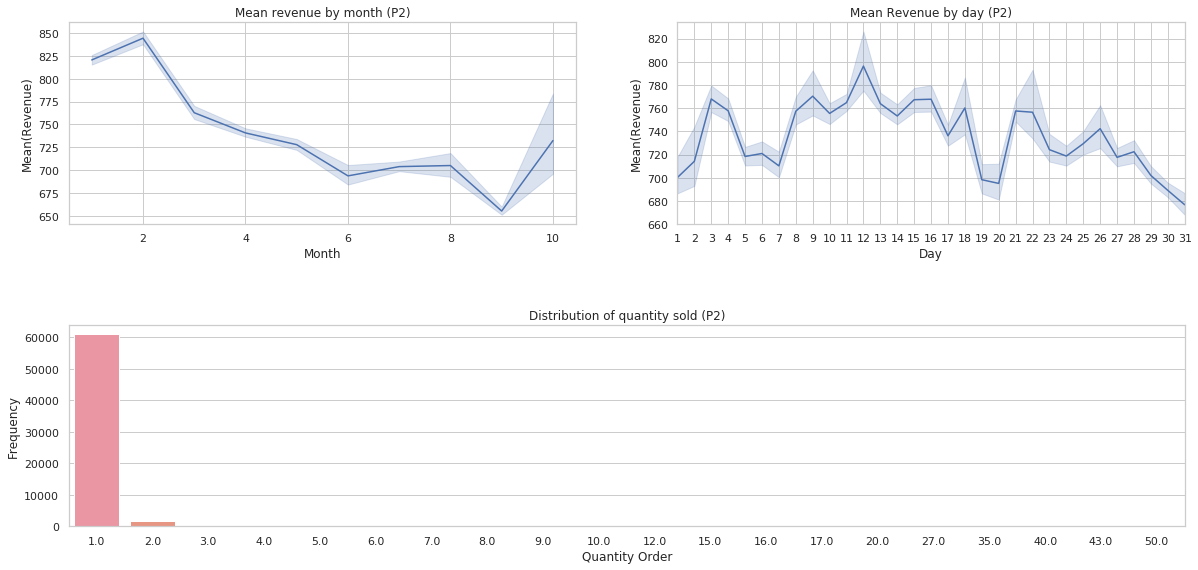

In [30]:
print('Mean of revenue by month of P2:')
print(df_sales_p2.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P2):')
print(
    round((df_sales_p2.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p2.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p2)

plt.title('Mean revenue by month (P2)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p2)

x = (np.arange(df_sales_p2.DAY.max()) + 1).astype(str)

plt.title('Mean Revenue by day (P2)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p2.DAY.max()))
plt.xticks(np.arange(df_sales_p2.DAY.max())+1, x)

plt.subplot(212)

sns.countplot(df_sales_p2['QTY_ORDER'])

plt.title('Distribution of quantity sold (P2)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P2)**
- Podemos observar um aumento na média das vendas do produto P2 no mês de janeiro e após isso um decréscimo nas vendas até o mês 9.

**Mean revenue by day (P2)**
- As maiores vendas realizadas para o produto P2 são entre os dias 8 e 16.

**Distribution of quantity sold (P2)**
- 96% dos clientes compram apenas 1 unidade do produto P2.

### 5. P3

In [31]:
df_sales_p3 = df_sales[df_sales['PROD_ID'] == 'P3']
df_sales_p3.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-31,P3,1.0,1049.0,2015,7,31,4,1049.0
2015-07-31,P3,1.0,1049.0,2015,7,31,4,1049.0
2015-08-02,P3,1.0,1098.0,2015,8,2,6,1098.0
2015-07-21,P3,1.0,1098.0,2015,7,21,1,1098.0
2015-07-25,P3,1.0,1149.0,2015,7,25,5,1149.0


Mean of revenue by month of P3:
MONTH
2     1481.733649
3     1422.953703
4     1325.018529
5     1311.132542
6     1261.643387
7     1140.176967
8     1204.285600
9     1253.644096
10    1196.764821
Name: REVENUE, dtype: float64

Distribution of quantity sold (P3):
QTY_ORDER
1.0    98.5857
2.0     1.2763
3.0     0.0690
6.0     0.0345
5.0     0.0345
Name: PROD_ID, dtype: float64


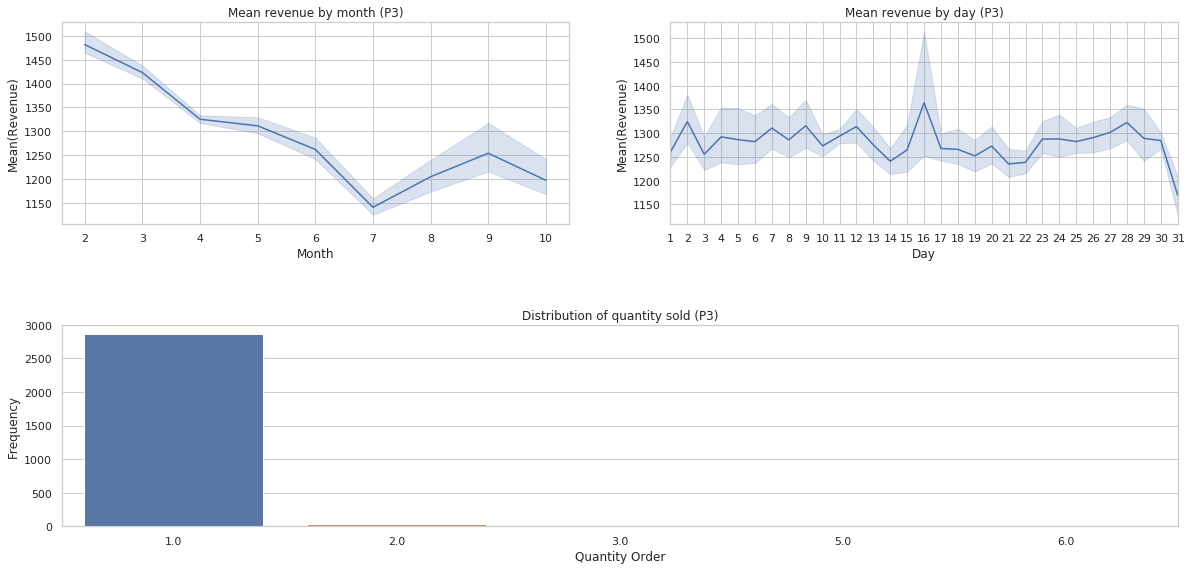

In [32]:
print('Mean of revenue by month of P3:')
print(df_sales_p3.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P3):')
print(
    round((df_sales_p3.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p3.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p3)

plt.title('Mean revenue by month (P3)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p3)

x = (np.arange(df_sales_p3.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P3)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p3.DAY.max()))
plt.xticks(np.arange(df_sales_p3.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p3['QTY_ORDER'])

plt.title('Distribution of quantity sold (P3)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P3)**
- As vendas do produto P3 vêm decrescendo de fevereiro até o mês julho e tem um aumento até o mês de setembro.

**Mean revenue by day (P3)**
- A média das vendas por dia tem leves variações tanto de aumento quanto de diminuição no valor médio.

**Distribution of quantity sold (P3)**
- 98% dos clientes compram apenas 1 unidade do produto P3

### 6. P4

In [33]:
df_sales_p4 = df_sales[df_sales['PROD_ID'] == 'P4']
df_sales_p4.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-25,P4,1.0,540.55,2015,7,25,5,540.55
2015-08-26,P4,1.0,499.90,2015,8,26,2,499.90
2015-08-05,P4,1.0,569.00,2015,8,5,2,569.00
2015-07-26,P4,1.0,689.99,2015,7,26,6,689.99
2015-07-26,P4,1.0,689.90,2015,7,26,6,689.90


Mean of revenue by month of P4:
MONTH
3     565.120455
4     596.379187
5     576.878154
6     541.487886
7     742.445659
8     578.312493
9     571.114716
10    528.596585
Name: REVENUE, dtype: float64

Distribution of quantity sold (P4):
QTY_ORDER
1.0      93.8387
2.0       4.3941
3.0       0.6482
5.0       0.4162
4.0       0.2456
6.0       0.2047
50.0      0.0614
10.0      0.0341
40.0      0.0136
9.0       0.0136
11.0      0.0136
100.0     0.0136
15.0      0.0136
12.0      0.0068
7.0       0.0068
109.0     0.0068
23.0      0.0068
24.0      0.0068
28.0      0.0068
29.0      0.0068
30.0      0.0068
31.0      0.0068
35.0      0.0068
71.0      0.0068
85.0      0.0068
20.0      0.0068
Name: PROD_ID, dtype: float64


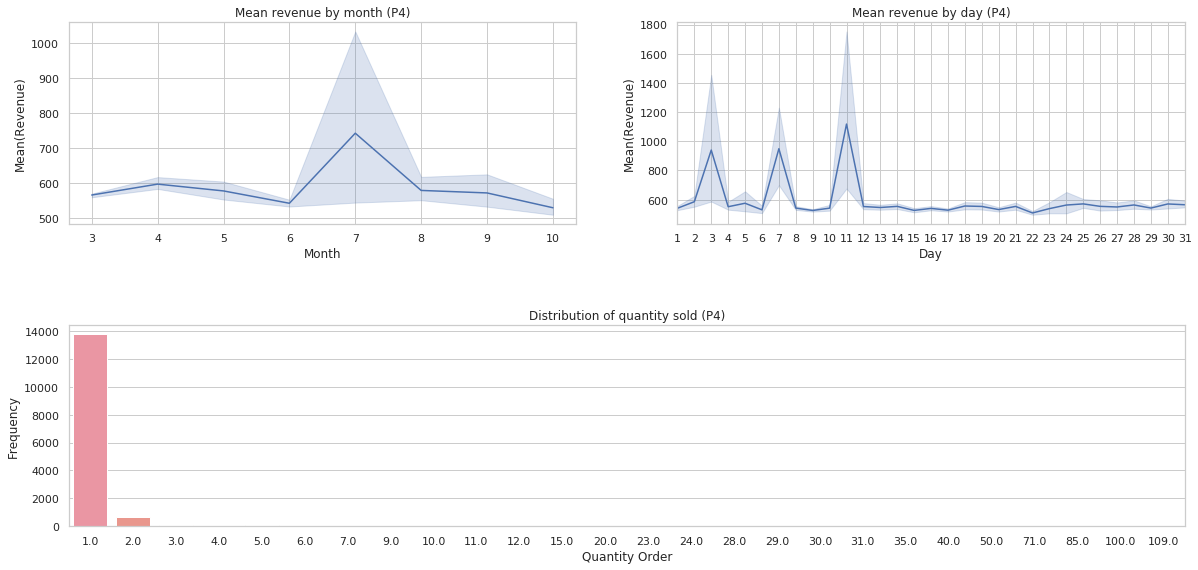

In [34]:
print('Mean of revenue by month of P4:')
print(df_sales_p4.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P4):')
print(
    round((df_sales_p4.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p4.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p4)

plt.title('Mean revenue by month (P4)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p4)

x = (np.arange(df_sales_p4.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P4)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p4.DAY.max()))
plt.xticks(np.arange(df_sales_p4.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p4['QTY_ORDER'])

plt.title('Distribution of quantity sold (P4)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P3)**
- O produto 4 tem uma leve queda até o mês de junho, onde há pico nas vendas no mês de julho e novamente o seu valor médio volta ao normal (quase constante, tendo pouca variação).

**Mean revenue by day (P4)**
- As vendas diárias do produto 4 tem a sua variação quase constante, porém os dias 3, 7 e 11 tem um aumento significativo na média da receita. Podemos supor que na maior parte do mês este produto é comprado poucas vezes.

**Distribution of quantity sold (P4)**
- No gráfico da distribuição por quantidade vendida, podemos observar que 94% dos clientes compram apenas 1 unidade do produto 4 e 4.3% compram 2 unidades.

### 7. P5

In [35]:
df_sales_p5 = df_sales[df_sales['PROD_ID'] == 'P5']
df_sales_p5.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-25,P5,1.0,935.0,2015,7,25,5,935.0
2015-07-22,P5,1.0,799.0,2015,7,22,2,799.0
2015-07-21,P5,1.0,799.0,2015,7,21,1,799.0
2015-07-17,P5,1.0,749.0,2015,7,17,4,749.0
2015-07-21,P5,1.0,799.0,2015,7,21,1,799.0


Mean of revenue by month of P5:
MONTH
4     1049.150278
5      972.027883
6      851.169691
7      793.842416
8      805.947977
9      806.787946
10     792.149297
Name: REVENUE, dtype: float64

Distribution of quantity sold (P5):
QTY_ORDER
1.0     96.4046
2.0      2.6498
5.0      0.3540
3.0      0.2731
6.0      0.1871
4.0      0.1163
41.0     0.0051
39.0     0.0051
37.0     0.0051
Name: PROD_ID, dtype: float64


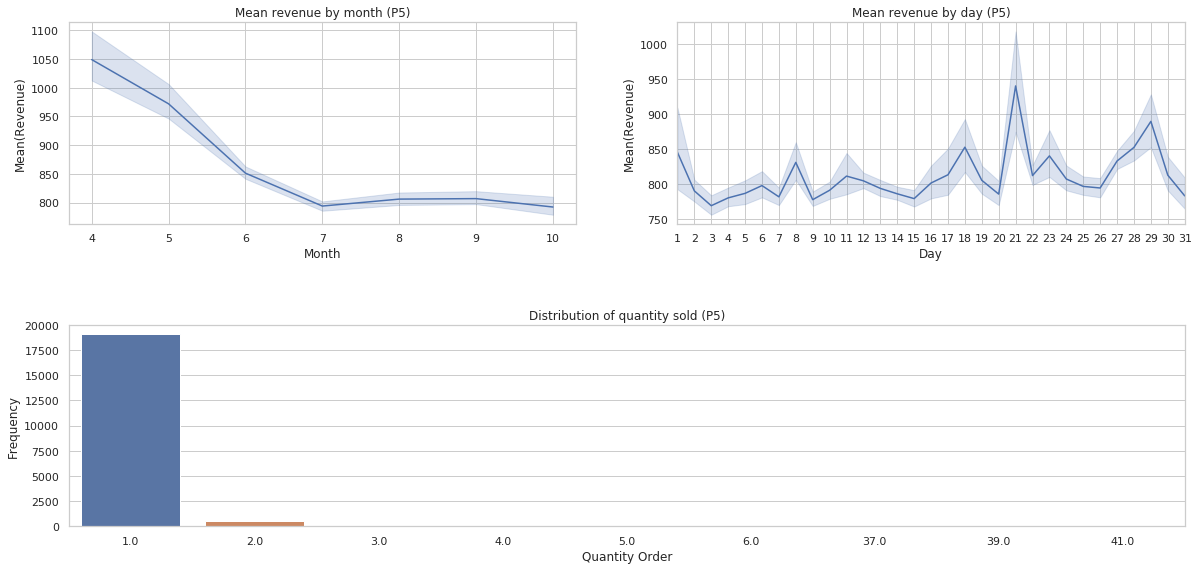

In [36]:
print('Mean of revenue by month of P5:')
print(df_sales_p5.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P5):')
print(
    round((df_sales_p5.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p5.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p5)

plt.title('Mean revenue by month (P5)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p5)

x = (np.arange(df_sales_p5.DAY.max()) + 1).astype(str)

plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.title('Mean revenue by day (P5)')
plt.xlim((1, df_sales_p5.DAY.max()))
plt.xticks(np.arange(df_sales_p5.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p5['QTY_ORDER'])

plt.title('Distribution of quantity sold (P5)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P5)**
- Os produtos P5 tem uma média da receita alta apenas no mês de abril e vai decrescendo até o mês de julho, a partir deste mês até outubro os valores médio tem pouca alteração.

**Mean revenue by day (P5)**
- Podemos analisar que o produto 5 apesar de ter um decréscimo mensal no seu valor médio da receita, os seus valores médios diários existem bastante variações em entre dias pontuais.

**Distribution of quantity sold (P5)**
- Apesar dos seus valores diários um aumento em dias pontuais, 96% das vendas contém apenas 1 quantidade do produto 5.

### 8. P6

In [37]:
df_sales_p6 = df_sales[df_sales['PROD_ID'] == 'P6']
df_sales_p6.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-08-02,P6,1.0,1808.99,2015,8,2,6,1808.99
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00
2015-08-17,P6,1.0,1673.95,2015,8,17,0,1673.95
2015-08-11,P6,1.0,1674.00,2015,8,11,1,1674.00
2015-08-17,P6,1.0,1674.00,2015,8,17,0,1674.00


Mean of revenue by month of P6:
MONTH
1     1926.031531
2     1762.441349
3     1798.081012
4     1817.741821
5     1834.926325
6     1789.012278
7     1743.420364
8     1714.891307
9     1537.704835
10    1535.038660
Name: REVENUE, dtype: float64
Distribution of quantity sold (P6):
QTY_ORDER
1.0     98.3667
2.0      1.2921
3.0      0.1463
5.0      0.0975
12.0     0.0488
24.0     0.0244
10.0     0.0244
Name: PROD_ID, dtype: float64


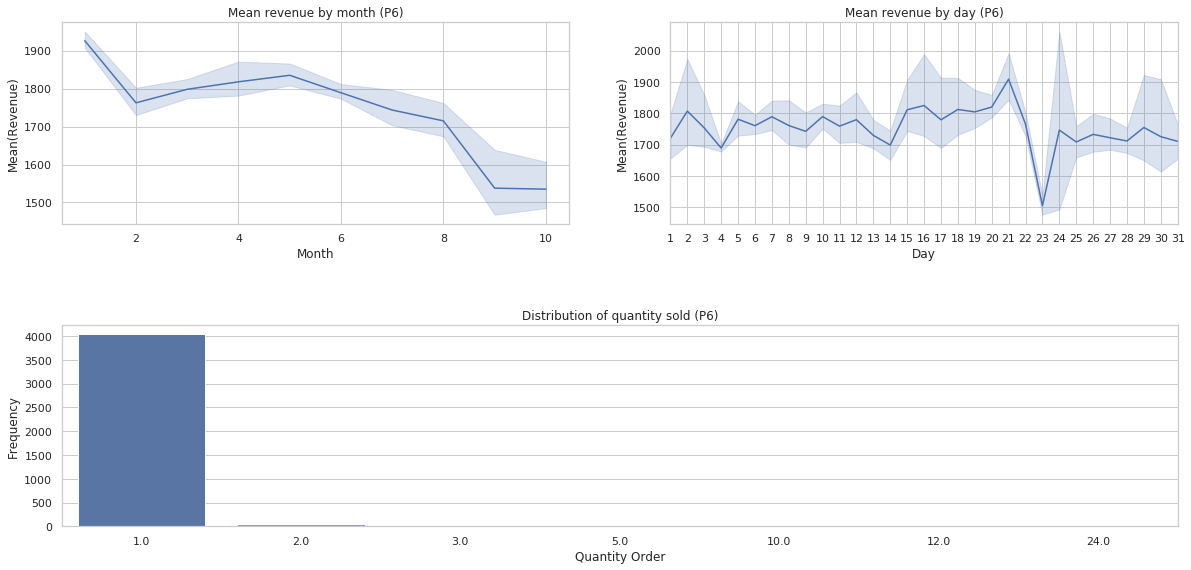

In [39]:
print('Mean of revenue by month of P6:')
print(df_sales_p6.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P6):')
print(
    round((df_sales_p6.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p6.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p6)

plt.title('Mean revenue by month (P6)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p6)

x = (np.arange(df_sales_p6.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P6)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p6.DAY.max()))
plt.xticks(np.arange(df_sales_p6.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p6['QTY_ORDER'])

plt.title('Distribution of quantity sold (P6)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P6)**
- Podemos observar uma queda significativa na média das vendas do mês de janeiro até fevereiro, logo após há um leve crescimento até o mês maio e uma diminução gradual até o mês setembro.

**Mean revenue by day (P6)**
- Existem diversas variações nas média das vendas diárias que não são muito significativas, somente no final do mês podemos observar uma queda.

**Distribution of quantity sold (P6)**
- 98% das vendas contém apenas 1 unidade.

### 9. P7

In [41]:
df_sales_p7 = df_sales[df_sales['PROD_ID'] == 'P7']
df_sales_p7.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-31,P7,1.0,749.0,2015,7,31,4,749.0
2015-07-25,P7,1.0,749.0,2015,7,25,5,749.0
2015-08-02,P7,1.0,752.0,2015,8,2,6,752.0
2015-08-02,P7,1.0,752.0,2015,8,2,6,752.0
2015-07-17,P7,1.0,749.0,2015,7,17,4,749.0


Mean of revenue by month of P7:
MONTH
1     860.442439
2     874.765825
3     895.445514
4     872.802125
5     831.445669
6     822.977531
7     793.183142
8     762.346568
9     745.235600
10    765.480196
Name: REVENUE, dtype: float64

Distribution of quantity sold (P7):
QTY_ORDER
1.0      95.0576
2.0       3.7910
3.0       0.4563
5.0       0.4338
4.0       0.1613
6.0       0.0510
10.0      0.0301
30.0      0.0031
20.0      0.0026
7.0       0.0026
12.0      0.0020
25.0      0.0015
15.0      0.0015
16.0      0.0010
50.0      0.0010
8.0       0.0010
500.0     0.0005
14.0      0.0005
28.0      0.0005
39.0      0.0005
13.0      0.0005
Name: PROD_ID, dtype: float64


/home/leonardo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


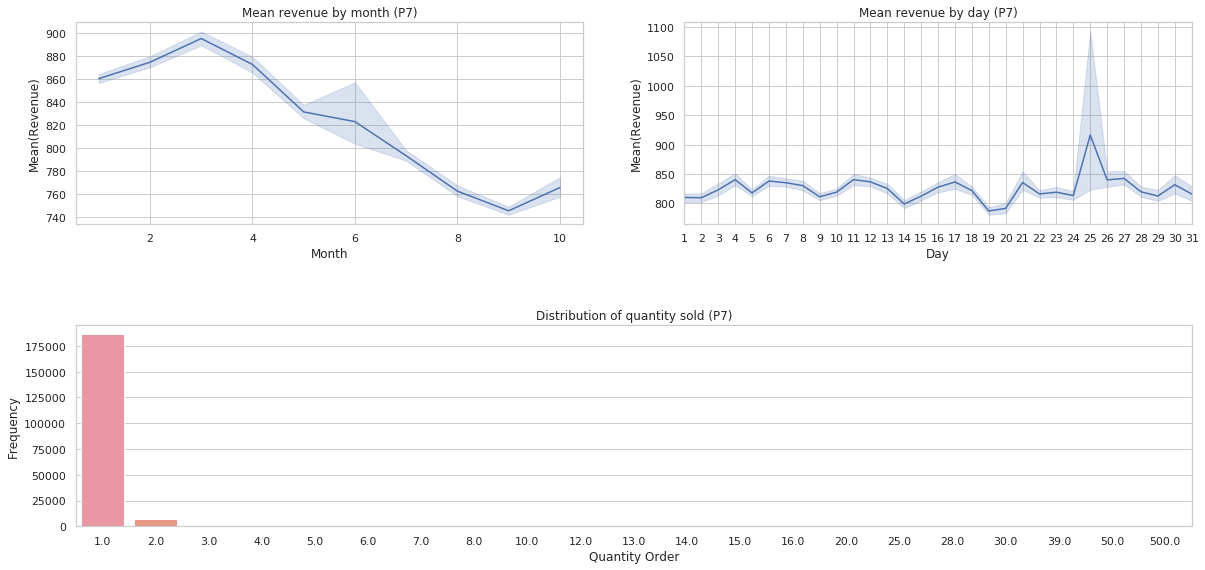

In [42]:
print('Mean of revenue by month of P7:')
print(df_sales_p7.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P7):')
print(
    round((df_sales_p7.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p7.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p7)

plt.title('Mean revenue by month (P7)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p7)

x = (np.arange(df_sales_p7.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P7)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p7.DAY.max()))
plt.xticks(np.arange(df_sales_p7.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p7['QTY_ORDER'])

plt.title('Distribution of quantity sold (P7)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P7)**
- Podemos observar um crescimento no valor médio entre janeiro e fevereiro, a partir de março até agosto o gráfico nos mostra uma diminuição na venda do produto P7.

**Mean revenue by day (P7)**
- Podemos observar pequenas variações no aumento e diminuição nas vendas diárias do produto P7. No dia 25 o gráfico nos mostra um pico no aumento das vendas.

**Distribution of quantity sold (P7)**
- 95% das vendas contém uma unidade do produto 7 e 3% duas quantidades.

### 10. P8

In [44]:
df_sales_p8 = df_sales[df_sales['PROD_ID'] == 'P8']
df_sales_p8.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-07-28,P8,4.0,1604.00,2015,7,28,1,401.00
2015-07-30,P8,1.0,388.16,2015,7,30,3,388.16
2015-07-31,P8,1.0,388.16,2015,7,31,4,388.16
2015-07-29,P8,1.0,448.52,2015,7,29,2,448.52
2015-07-25,P8,1.0,439.00,2015,7,25,5,439.00


Mean of revenue by month of P8:
MONTH
3     585.456995
4     520.342590
5     471.454355
6     497.097016
7     472.126985
8     422.979394
9     411.469277
10    422.123493
Name: REVENUE, dtype: float64

Distribution of quantity sold (P8):
QTY_ORDER
1.0     94.9784
2.0      4.1703
3.0      0.4131
5.0      0.2191
6.0      0.1078
4.0      0.0898
40.0     0.0072
10.0     0.0072
15.0     0.0036
11.0     0.0036
Name: PROD_ID, dtype: float64


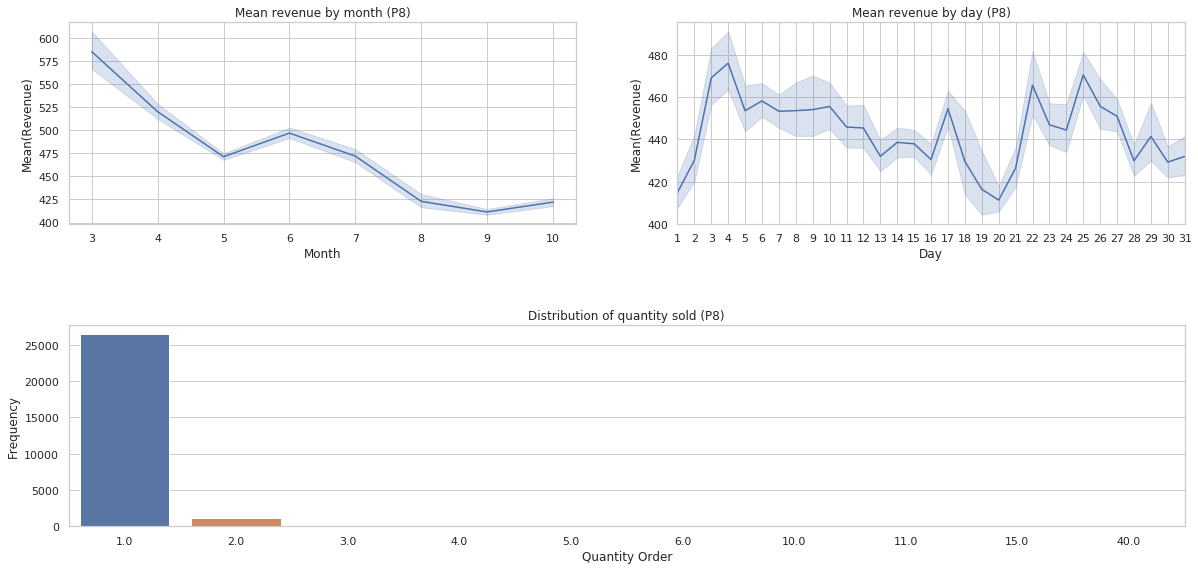

In [45]:
print('Mean of revenue by month of P8:')
print(df_sales_p8.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P8):')
print(
    round((df_sales_p8.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p8.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p8)

plt.title('Mean revenue by month (P8)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p8)

x = (np.arange(df_sales_p8.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P8)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p8.DAY.max()))
plt.xticks(np.arange(df_sales_p8.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p8['QTY_ORDER'])

plt.title('Distribution of quantity sold (P8)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P8)**
- Ao analisarmos podemos uma queda constante entre os meses de março e outubro, exceto no mês de maio.

**Mean revenue by day(P8)**
- As vendas diárias para este produto existem grande variações, no primeiros e nos últimos dias temos um aumento significativo nas vendas.

**Distribution of quantity sold (P8)**
- 95% das vendas possuem apenas uma quantidade do produto.

### 11. P9

In [46]:
df_sales_p9 = df_sales[df_sales['PROD_ID'] == 'P9']
df_sales_p9.head()

,PROD_ID,QTY_ORDER,REVENUE,YEAR,MONTH,DAY,WEEKDAY,VL_UNIT
DATE_ORDER,,,,,,,,
2015-09-24,P9,1.0,399.0,2015,9,24,3,399.0
2015-08-02,P9,1.0,435.0,2015,8,2,6,435.0
2015-07-25,P9,2.0,878.0,2015,7,25,5,439.0
2015-08-02,P9,1.0,435.0,2015,8,2,6,435.0
2015-08-02,P9,1.0,435.0,2015,8,2,6,435.0


Mean of revenue by month of P9:
MONTH
3     576.311304
4     505.706888
5     476.737577
6     527.673719
7     464.059598
8     426.722495
9     409.701574
10    416.695545
Name: REVENUE, dtype: float64

Distribution of quantity sold (P9):
QTY_ORDER
1.0     95.7300
2.0      3.3585
3.0      0.4178
5.0      0.2442
6.0      0.1356
4.0      0.0814
10.0     0.0109
40.0     0.0054
20.0     0.0054
18.0     0.0054
15.0     0.0054
Name: PROD_ID, dtype: float64


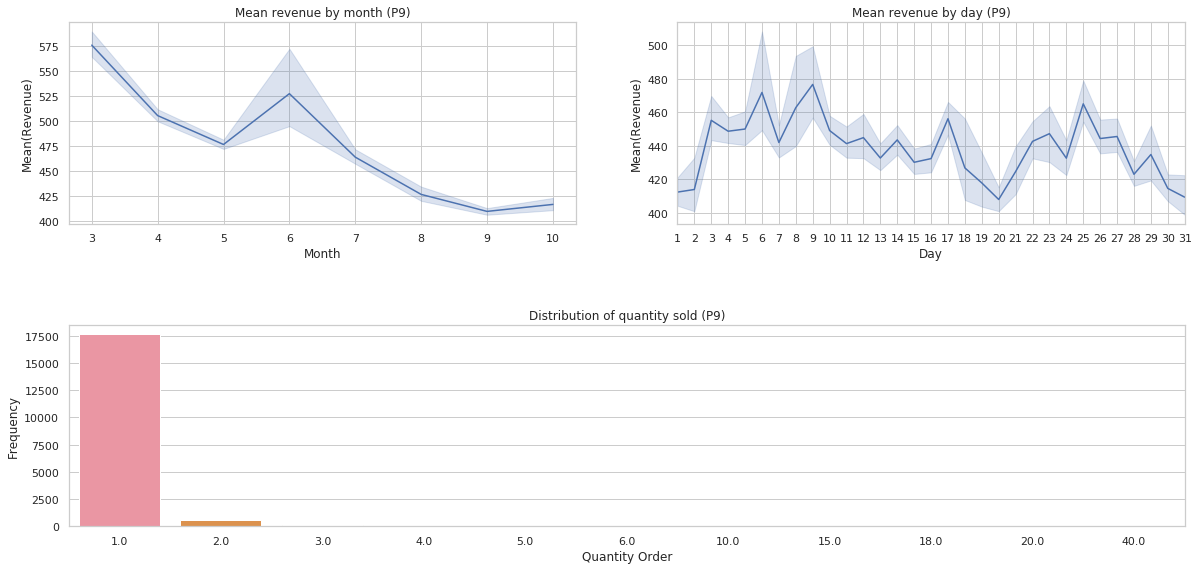

In [47]:
print('Mean of revenue by month of P9:')
print(df_sales_p9.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P9):')
print(
    round((df_sales_p9.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p9.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p9)

plt.title('Mean revenue by month (P9)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p9)

x = (np.arange(df_sales_p9.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P9)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p9.DAY.max()))
plt.xticks(np.arange(df_sales_p9.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p9['QTY_ORDER'])

plt.title('Distribution of quantity sold (P9)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P9)**
- O produto 9 vem diminuindo o valor médio da sua receita durante os meses de março e outubro, exceto maio que possue um pequeno aumento no valor médio da sua receita.

**Mean revenue by day (P9)**
- As vendas diárias para o produto 9 são bem inconstantes, os seus valores tem variações altas e baixas entre um dia e outro.

**Distribution of quatity sold (P9)**
- 95% dos das vendas os clientes compram apenas uma quantidade deste produto.

### 12. Competitor

In [12]:
df_comp.head()

,PROD_ID,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,YEAR,MONTH,DAY,WEEKDAY
DATE_EXTRACTION,,,,,,,,
2015-01-30 08:11:38,P6,C3,1898.00,1,2015,1,30,4
2015-01-30 08:11:38,P6,C1,1898.00,1,2015,1,30,4
2015-01-30 08:11:38,P6,C6,1999.90,1,2015,1,30,4
2015-01-31 20:10:14,P6,C2,1894.88,2,2015,1,31,5
2015-01-31 20:10:14,P6,C3,1894.88,2,2015,1,31,5


In [38]:
df_comp['COMP_PROD'] = df_comp['COMPETITOR'] + '.' + df_comp['PROD_ID']
df_comp.head()

,PROD_ID,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,YEAR,MONTH,DAY,WEEKDAY,COMP_PROD
DATE_EXTRACTION,,,,,,,,,
2015-01-30 08:11:38,P6,C3,1898.00,1,2015,1,30,4,C3.P6
2015-01-30 08:11:38,P6,C1,1898.00,1,2015,1,30,4,C1.P6
2015-01-30 08:11:38,P6,C6,1999.90,1,2015,1,30,4,C6.P6
2015-01-31 20:10:14,P6,C2,1894.88,2,2015,1,31,5,C2.P6
2015-01-31 20:10:14,P6,C3,1894.88,2,2015,1,31,5,C3.P6


Total price by product:

  PROD_ID  COMPETITOR_PRICE
0      P6       18622108.13
1      P3        8320806.07
2      P2        7178053.97
3      P7        6922414.27
4      P1        5175114.48
5      P9        3267792.14
6      P8        2952614.91
7      P5        2165781.64
8      P4        1086072.91

Total sold by product:

  PROD_ID      REVENUE
0      P7  161242141.7
1      P2   46017485.2
2      P5   15907636.1
3      P8   12157680.4
4      P4    8456698.4
5      P9    7978901.5
6      P6    7079519.7
7      P1    6014096.7
8      P3    3714170.0



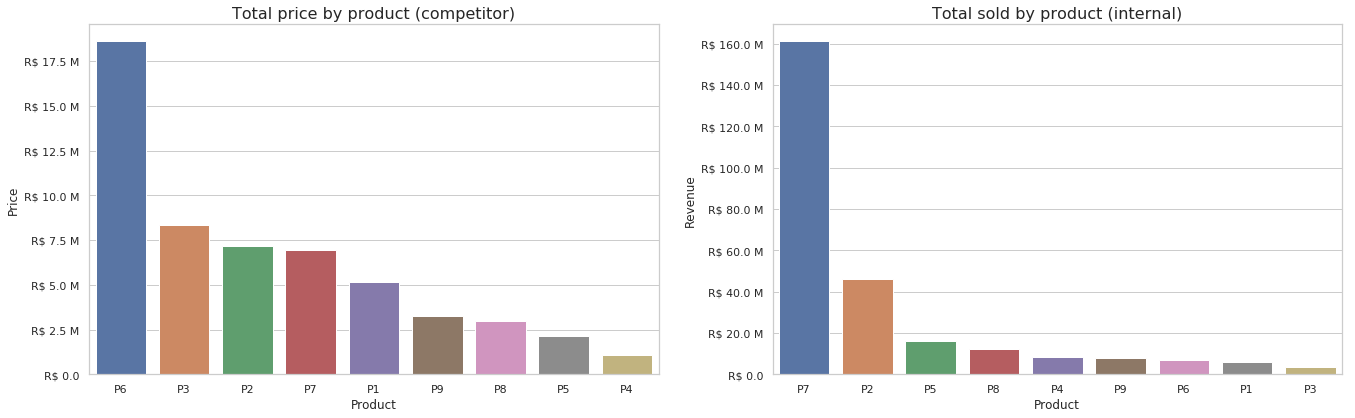

In [235]:
df_comp_sorted = df_comp \
        .groupby('PROD_ID')['COMPETITOR_PRICE'] \
        .sum() \
        .sort_values(ascending=False) \
        .to_frame() \
        .reset_index()

df_sales_sorted = round(df_sales.groupby('PROD_ID')['REVENUE'].sum(), 1).sort_values(ascending=False).to_frame().reset_index()

print('Total price by product:')

print('')
print(df_comp_sorted)
print('')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x='PROD_ID', y='COMPETITOR_PRICE', data=df_comp_sorted, ax=ax1)

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax1.set_title('Total price by product (competitor)', fontsize=16)
ax1.set_xlabel('Product')
ax1.set_ylabel('Price')

print('Total sold by product:')

print('')
print(df_sales_sorted)
print('')

sns.barplot(x='PROD_ID', y='REVENUE', data=df_sales_sorted, ax=ax2)

ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax2.set_title('Total sold by product (internal)', fontsize=16)
ax2.set_xlabel('Product')
ax2.set_ylabel('Revenue')

plt.show()

- Os produtos mais vendidos entre todos os competidores estão ordenados por ordem de grandeza no primeiro gráfico.
- Podemos observar que o comportamento das vendas dos concorrentes são diferentes das vendas internas, apesar de termos uma ordem de grandeza no valor totalmente diferente entre eles, o gráfico nos indica que os clientes que compram com os concorrentes, compram determinados produtos com mais frequência, comparado as vendas internas.

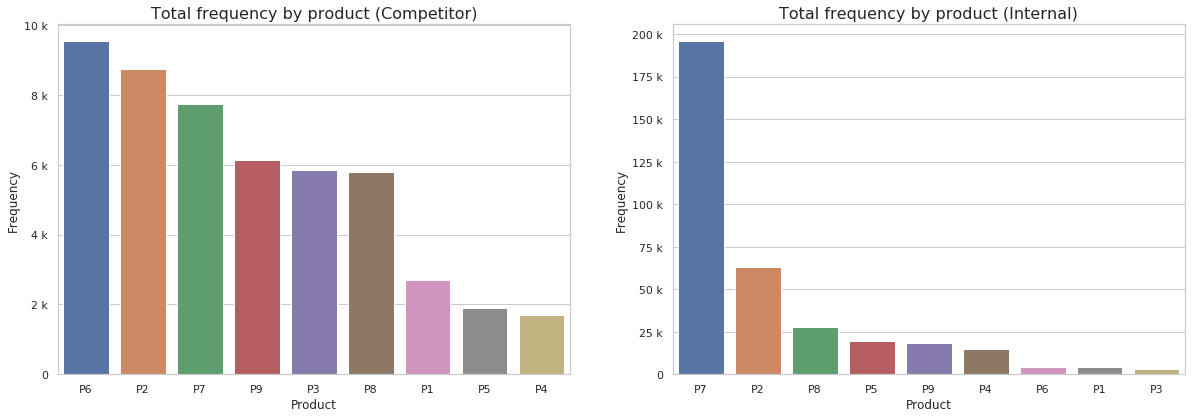

In [236]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='index', y='PROD_ID', data=df_comp.PROD_ID.value_counts().reset_index(), ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))
ax1.set_title('Total frequency by product (Competitor)', fontsize=16)
ax1.set_xlabel('Product')
ax1.set_ylabel('Frequency')

sns.barplot(x='index', y='PROD_ID', data=df_sales.PROD_ID.value_counts().reset_index(), ax=ax2)

ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))
ax2.set_title('Total frequency by product (Internal)', fontsize=16)
ax2.set_xlabel('Product')
ax2.set_ylabel('Frequency')

plt.show()

- Nos gráficos de frequências podemos observar que existem comportamentos totalmente diferentes, porém a ordem de grandeza nas vendas internas são muito maiores do que a dos concorrentes.
- Se levarmos em consideração o comportamento das vendas, vemos que a maioria dos produtos mais vendidos dos competidores são totalmente diferente, como por exemplo o produto 6, que é muito mais vendido do que os outros produtos. Já para as vendas internas ele não possui tanta saída em relação aos outros.

PROD_ID      P1    P2    P3    P4   P5    P6    P7    P8    P9
COMPETITOR                                                    
C1          765  1122  1646     0  628  2210   991  1253  1253
C2          703  1128  1652     0  636  2142   979  1263  1267
C3          396  2089   835     0  632  2166  1077  1253  1247
C4            0  1959   639  1085    0  1190  2249   863     4
C5          713   494   286    16    0     0  1549    14  1215
C6          136  1963   795   588    0  1834   903  1149  1137


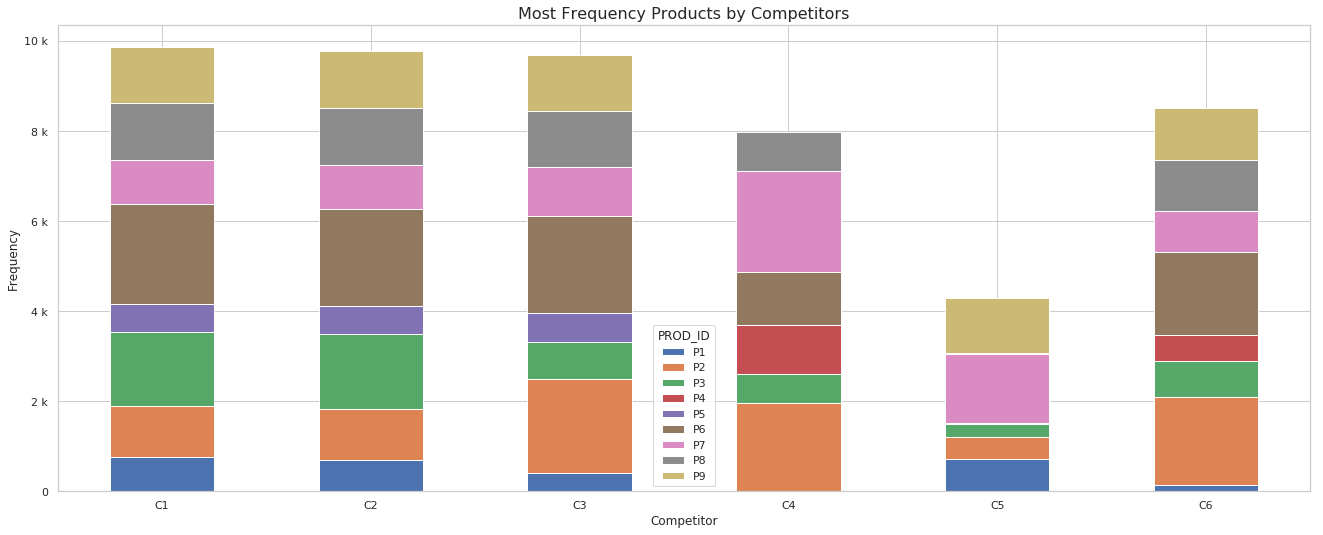

In [237]:
crosstab = pd.crosstab(
    index=df_comp.COMPETITOR,
    columns=df_comp.PROD_ID
)

print(crosstab)

f, ax = plt.subplots(figsize=(20, 8))

crosstab.plot(kind='bar', stacked=True, ax=ax)

plt.title('Most Frequency Products by Competitors', fontsize=16)
plt.xlabel('Competitor')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

plt.show()

- Neste gráfico podemos analisar a frequência de cada produto por concorrente.
- Analisando o gráfico acima, vemos que o produto P6 e P2 são muito vendido, independente do concorrente, exceto o concorrente C5.
- Podemos analisar também que o produto P7 tem uma variação entre os concorrentes, para os C4 e C5 eles tem uma venda boa.

Total price by competitor and product:

  COMP_PROD  COMPETITOR_PRICE
0     C1.P6        4168536.93
1     C2.P6        4085759.53
2     C3.P6        4063698.17
3     C6.P6        3944849.34
4     C4.P6        2359264.16
5     C2.P3        2206311.07
6     C1.P3        2186273.41
7     C4.P7        1850679.47
8     C6.P2        1695639.38
9     C4.P2        1628900.41



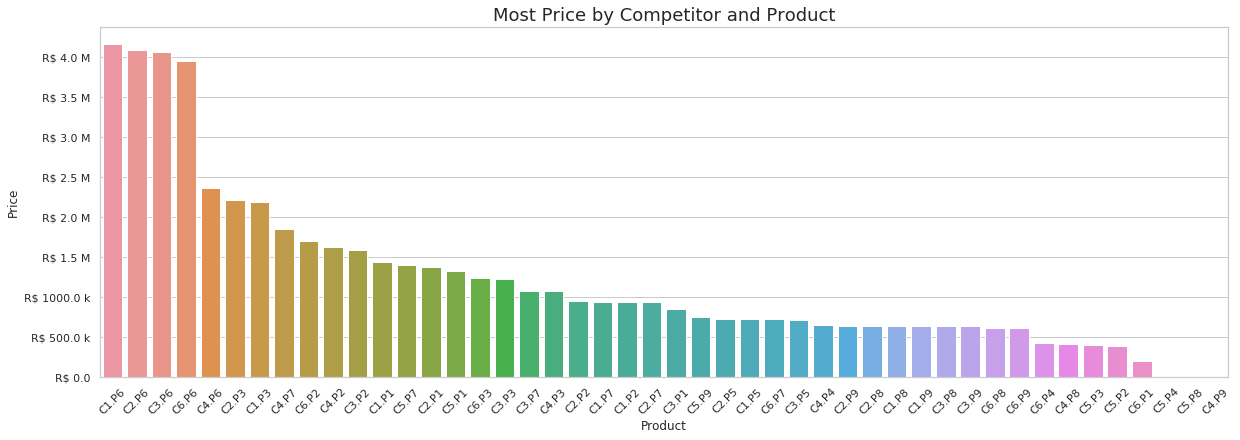

In [238]:
df = df_comp \
        .groupby('COMP_PROD')['COMPETITOR_PRICE'] \
        .sum() \
        .sort_values(ascending=False) \
        .to_frame() \
        .reset_index()

print('Total price by competitor and product:')

print('')
print(df[:10])
print('')

fig, ax = plt.subplots()

fig.set_size_inches((18, 6))

sns.barplot(x='COMP_PROD', y='COMPETITOR_PRICE', data=df)

plt.title('Most Price by Competitor and Product', fontsize=18)
plt.xlabel('Product')
plt.ylabel('Price')

ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.xticks(rotation=45)

plt.show()

- Podemos analisar que o produto 6 tem um valor de venda superior aos outros produtos, independente do concorrente, exceto o concorrente 4 que tem um valor muito abaixo em relação aos outros concorrentes.

   PaymentType  Quantity
0            1     25072
1            2     25042



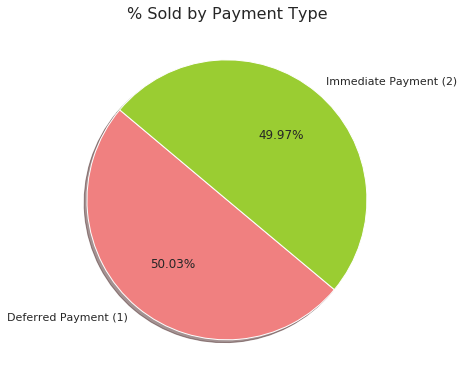

In [760]:
payments = df_comp.groupby('PAY_TYPE')['PROD_ID'].count().reset_index()
payments.columns = ['PaymentType', 'Quantity']

print(payments)
print('')

plt.figure(figsize=(12, 6))

plt.pie(
    payments.Quantity.values, 
    labels=payments.PaymentType.map(set_payment_type), 
    colors=['lightcoral', 'yellowgreen'], 
    shadow=True, 
    startangle=140,
    autopct='%1.2f%%'
)

plt.title('% Sold by Payment Type', fontsize=16)

plt.show()

Max value: R$ 6935362.06


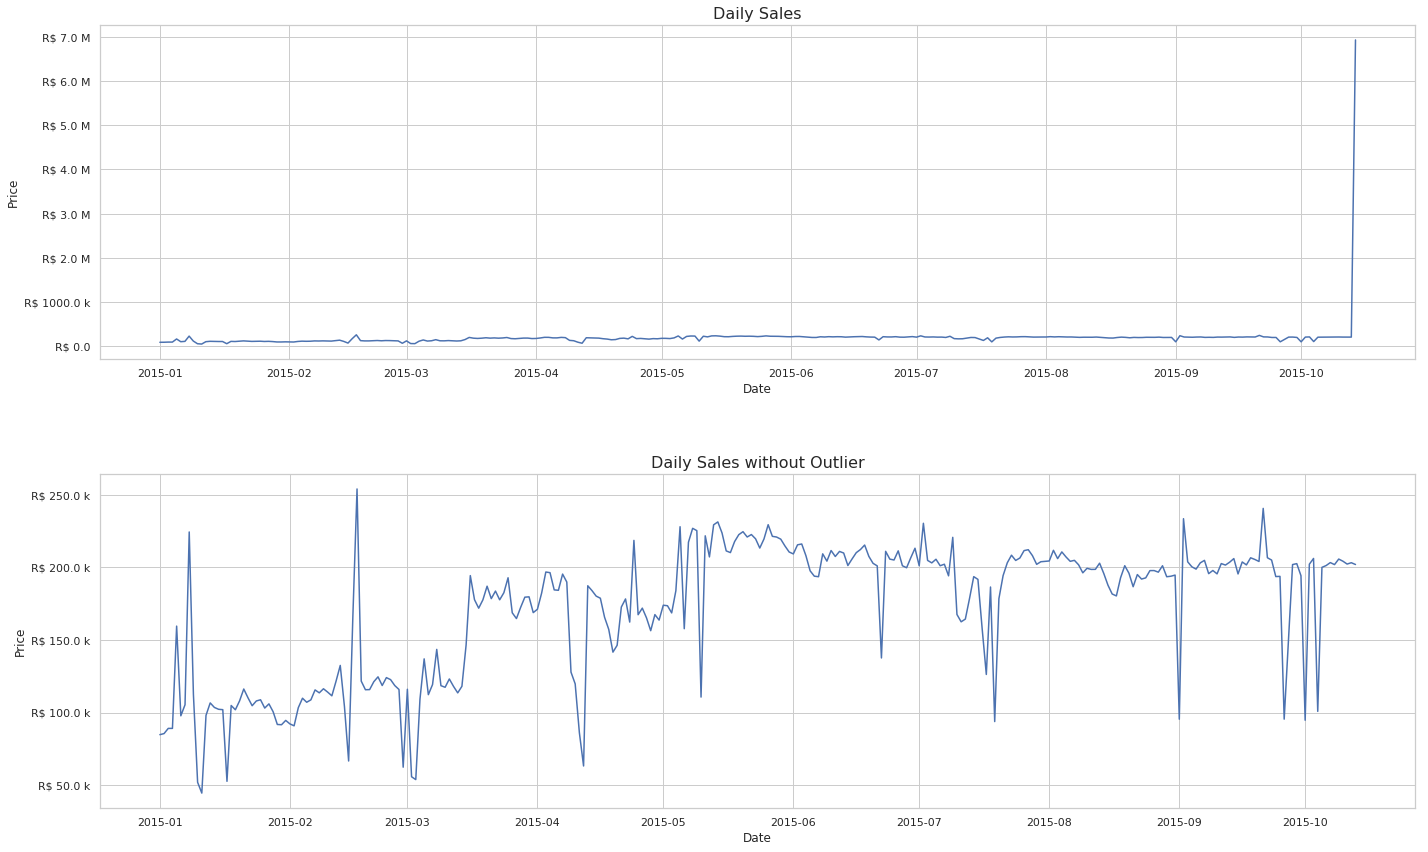

In [363]:
sale_by_date = df_comp.groupby('DATE')['COMPETITOR_PRICE'].sum().reset_index().sort_values(by='DATE')
sale_by_date.columns = ['Date', 'Price']

print('Max value: R$ %.2f' % sale_by_date.max().values[1])

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

sns.lineplot(x='Date', y='Price', data=sale_by_date, ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax1.set_title('Daily Sales', fontsize=16)

sns.lineplot(x='Date', y='Price', data=sale_by_date[sale_by_date['Price'] < 6000000], ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax2.set_title('Daily Sales without Outlier', fontsize=16)

plt.tight_layout(h_pad=5)

plt.show()

**Daily Sales**
- Neste gráfico podemos analisar no final do mês de outubro que temos uma venda de aproximadamente 7 milhões. Como este valor é muito grande, acaba tendo mais destaque do as vendas dos outros dias.

**Daily Sales without Outlier**
- Removendo o valor de 7 milhões, podemos analisar o comportamento do preço final das vendas do ano de 2015.
- Ao analisar a linha do gráfico, vemos que há um aumento no valor das vendas conforme o passar dos meses.
- Apesar do aumento no valor das vendas no período, podemos observar diversos picos na diminuição do valor das vendas.

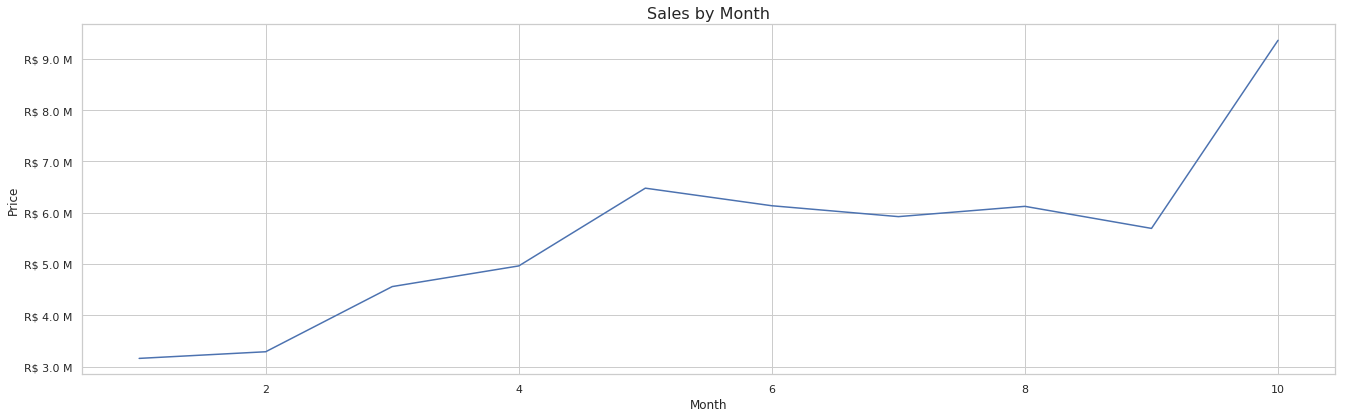

In [379]:
sales_by_month = df_comp.groupby('MONTH')['COMPETITOR_PRICE'].sum().reset_index()
sales_by_month.columns = ['Month', 'Price']

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(x='Month', y='Price', data=sales_by_month, ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax1.set_title('Sales by Month', fontsize=16)

plt.show()

- Como observado no gráfico anterior, podemos concluir um aumento no valor das venda ao longo do período.

### 13. P1

In [583]:
df_comp_p1 = df_comp[df_comp.PROD_ID == 'P1']
df_comp_p1.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
17290,P1,2015-03-16 20:10:14,C5,1424.05,2,2015-03-16,2015,3,16,0
17291,P1,2015-03-16 20:10:14,C2,1362.50,2,2015-03-16,2015,3,16,0
17292,P1,2015-03-16 20:10:14,C6,1499.00,2,2015-03-16,2015,3,16,0
17310,P1,2015-03-16 08:11:32,C5,1499.00,2,2015-03-16,2015,3,16,0
17311,P1,2015-03-16 08:11:32,C6,1499.00,2,2015-03-16,2015,3,16,0
17312,P1,2015-06-18 20:10:22,C1,1349.10,2,2015-06-18,2015,6,18,3
17313,P1,2015-06-18 20:10:22,C2,1259.10,2,2015-06-18,2015,6,18,3
17314,P1,2015-06-18 20:10:22,C3,1259.10,2,2015-06-18,2015,6,18,3
17315,P1,2015-06-18 20:10:22,C5,1424.05,2,2015-06-18,2015,6,18,3
17316,P1,2015-03-20 08:12:50,C1,1499.00,1,2015-03-20,2015,3,20,4


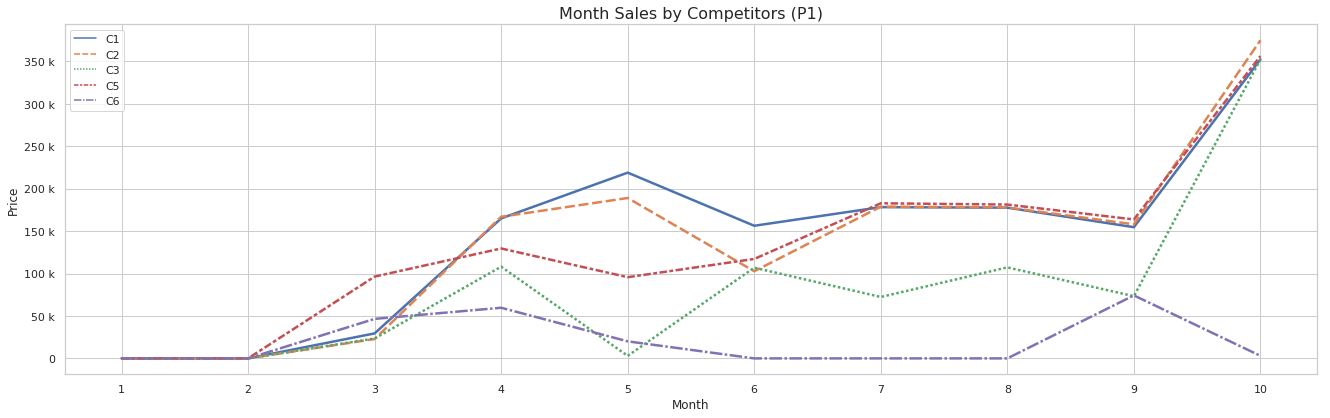

In [671]:
sales_by_comp_month = df_comp_p1.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)

ax1.set_title('Month Sales by Competitors (P1)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- No gráfico acima podemos comparar o valor total das vendas entre os concorrentes no exercício de 2015.
- Os concorrentes C1, C2, C3 e C5 vem tendo um aumento nas vendas ao longo do tempo.
- O concorrente C6 vem tendo um pequeno aumento nas vendas entre fevereiro e março, a partir do mês de abril as suas vendas vem decrescendo e se mantém constante até o mês de agosto, onde tem um pico (crescente) significativo.

       Price           Payment Type  Frequency
12  149900.0  Immediate Payment (2)          1
42  149900.0   Deferred Payment (1)          4
1   134910.0  Immediate Payment (2)          1
17  131912.0  Immediate Payment (2)          2
85    1899.0   Deferred Payment (1)        142
86    1899.0  Immediate Payment (2)        142
19    1829.9   Deferred Payment (1)          2
18    1829.9  Immediate Payment (2)          2
74    1599.9   Deferred Payment (1)         20
73    1599.9  Immediate Payment (2)         20

Payment Type
Deferred Payment (1)     46.153846
Immediate Payment (2)    53.846154
dtype: float64


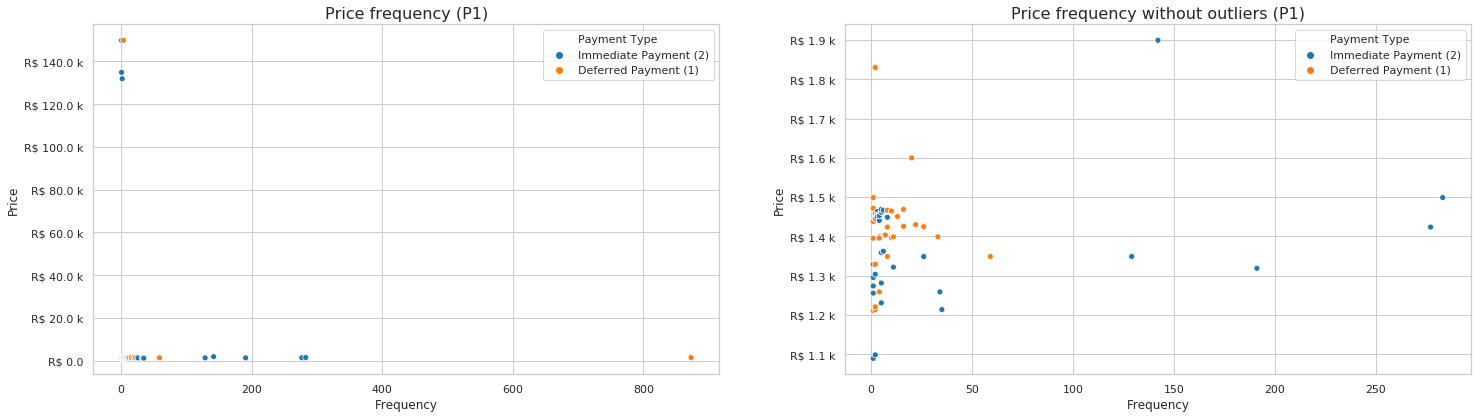

In [769]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P1'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P1)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 130000) & (qt_price['Frequency'] < 400)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P1)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- No primeiro gráfico, podemos observar 3 valores fora do padrão do restante das vendas, ao remover esses valores vemos que a maioria dos clientes compram mais de uma quantidade. Pois a aglomeração dos pontos encontram-se acima do valor mínimo.
- 54% das vendas foram pago à vista e 46% foram parceladas.

### 14. P2

In [581]:
df_comp_p2 = df_comp[df_comp.PROD_ID == 'P2']
df_comp_p2.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
17293,P2,2015-02-23 20:10:06,C3,799.00,1,2015-02-23,2015,2,23,0
17294,P2,2015-02-23 20:10:06,C5,829.00,1,2015-02-23,2015,2,23,0
17295,P2,2015-02-23 20:10:06,C4,829.00,1,2015-02-23,2015,2,23,0
17296,P2,2015-02-23 20:10:06,C6,878.00,1,2015-02-23,2015,2,23,0
17297,P2,2015-02-17 08:10:23,C3,778.00,1,2015-02-17,2015,2,17,1
17298,P2,2015-02-17 08:10:23,C5,829.00,1,2015-02-17,2015,2,17,1
17299,P2,2015-02-17 08:10:23,C4,812.42,1,2015-02-17,2015,2,17,1
17300,P2,2015-02-17 08:10:23,C6,879.00,1,2015-02-17,2015,2,17,1
17301,P2,2015-02-17 08:11:34,C1,788.00,1,2015-02-17,2015,2,17,1
17302,P2,2015-02-17 08:11:34,C4,829.00,1,2015-02-17,2015,2,17,1


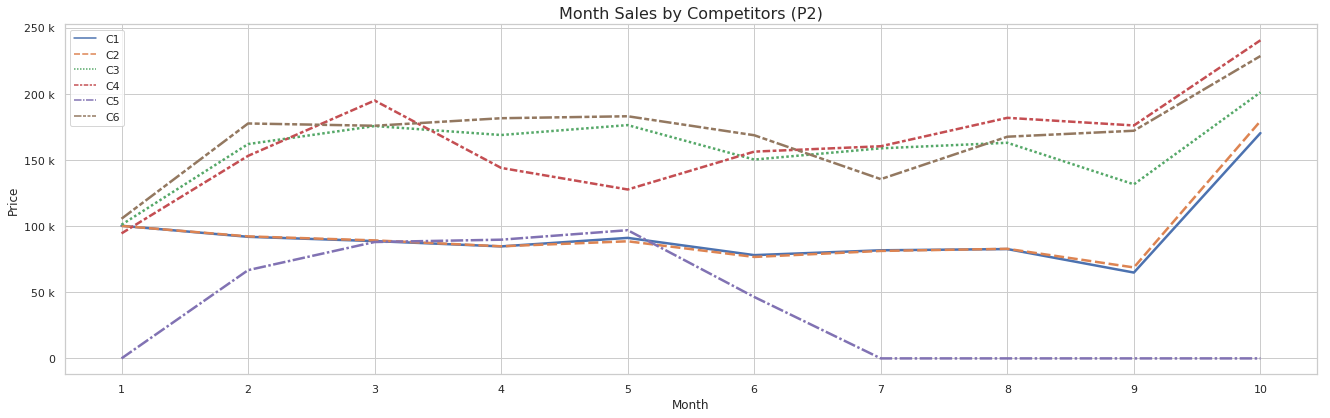

In [672]:
sales_by_comp_month = df_comp_p2.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)

ax1.set_title('Month Sales by Competitors (P2)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- O concorrente C1 tem um leve aumento no início do ano e tem pequenas variações até o mês abril, a partir do mês de maio as suas vendas vêm diminuindo levemente até ter um aumento em setembro.
- Os concorrentes C2 e C3 tem algumas variações nas vendas duranto o exercício mas no segundo semestre as suas vendas aumentam consideravelmente.
- Os concorrentes C4 e C5 tem as suas vendas constante ao longo do tempo e a partir de setembro as suas vendas aumentam.
- As vendas do concorrente C6 fica em torno de 55 mil no primeiro semestre e ao final vêm decrescendo até não terem mais vendas a partir de julho.

       Price           Payment Type  Frequency
143  79900.0  Immediate Payment (2)          1
24   79900.0   Deferred Payment (1)          1
91   74800.0  Immediate Payment (2)          1
92   74800.0   Deferred Payment (1)          1
93   72498.0  Immediate Payment (2)          1
291  72498.0   Deferred Payment (1)          3
265  65248.0  Immediate Payment (2)          2
541   1089.0   Deferred Payment (1)         13
542   1089.0  Immediate Payment (2)         13
262    979.0   Deferred Payment (1)          2

Payment Type
Deferred Payment (1)     46.944858
Immediate Payment (2)    53.055142
dtype: float64


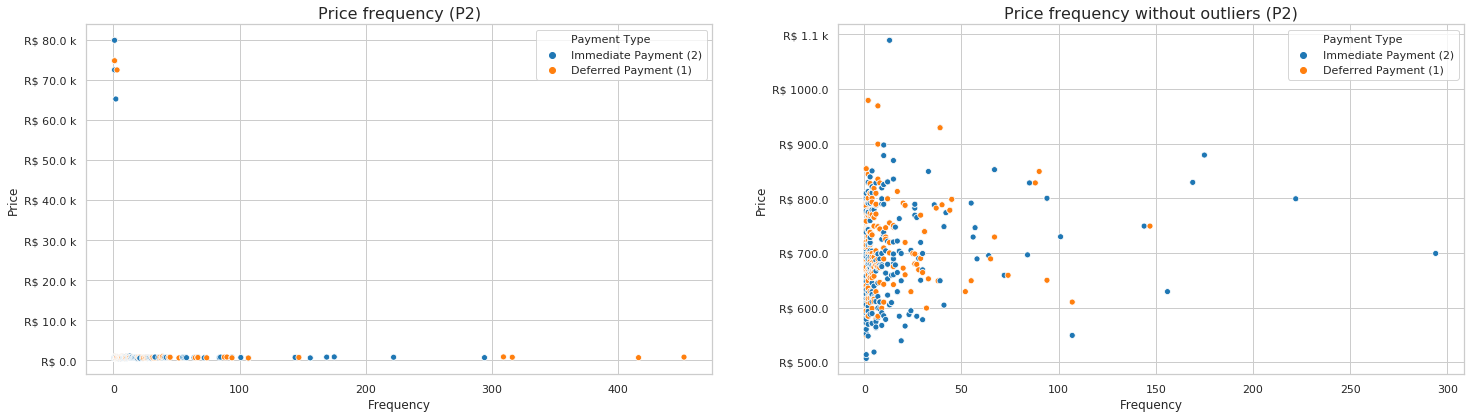

In [770]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P2'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P2)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 60000) & (qt_price['Frequency'] < 300)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P2)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- A distribuição das vendas por tipo de pagamento estão bem equilibradas, 53% para pagamentos à vista e 47 para pagamento parcelado.
- Podemos observar também que existem alguns valores que estão na faixa de 65 mil à 80 mil. Provavelmente esses produtos devem ter sido vendidos em grande quantidade, pois o agrupamento dos seus pontos ficam em torno de 500 à 1100.

### 15. P3

In [685]:
df_comp_p3 = df_comp[df_comp.PROD_ID == 'P3']
df_comp_p3.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
37131,P3,2015-03-16 20:10:05,C3,1499.00,1,2015-03-16,2015,3,16,0
37132,P3,2015-03-16 20:10:05,C5,1543.90,1,2015-03-16,2015,3,16,0
37133,P3,2015-03-16 20:10:05,C3,1499.00,2,2015-03-16,2015,3,16,0
37134,P3,2015-03-16 20:10:05,C5,1312.32,2,2015-03-16,2015,3,16,0
37135,P3,2015-03-16 20:10:05,C2,1499.00,2,2015-03-16,2015,3,16,0
37136,P3,2015-03-16 20:10:05,C1,1499.00,2,2015-03-16,2015,3,16,0
37137,P3,2015-03-16 20:10:05,C2,1499.00,1,2015-03-16,2015,3,16,0
37138,P3,2015-03-16 20:10:05,C1,1499.00,1,2015-03-16,2015,3,16,0
37139,P3,2015-03-16 20:10:14,C4,1499.00,2,2015-03-16,2015,3,16,0
37140,P3,2015-03-16 20:10:14,C1,1498.99,2,2015-03-16,2015,3,16,0


In [779]:
import IPython

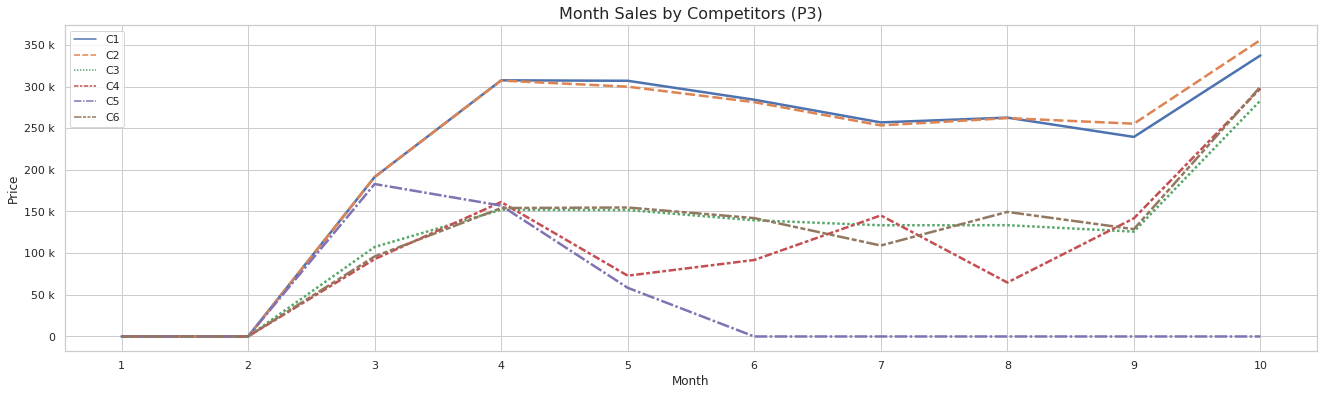

In [782]:
sales_by_comp_month = df_comp_p3.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P3)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- Os concorrentes C1 e C2 possuem praticamente o mesmo comportamento, tendo um crescimento a partir de fevereiro até março, em abril eles tem uma leve queda nas vendas e em setembro voltam novamente a crescer o valor de suas vendas.
- Os concorrentes C3 C4 e C6 também possuem um comportamento pareeido, exceto o concorrente C4 que em alguns meses tem uma diminuição nas vendas.
- O concorrente C5 tem um crescimento no mês de fevereiro e de março até maio vem decrescendo, a partir de junho suas vendas ficam constante.

         Price           Payment Type  Frequency
246  119900.00   Deferred Payment (1)          5
186  119900.00  Immediate Payment (2)          3
97   107910.00  Immediate Payment (2)          1
101  105512.00  Immediate Payment (2)          1
422    1543.90   Deferred Payment (1)         43
301    1502.91   Deferred Payment (1)          8
446    1499.00   Deferred Payment (1)        305
443    1499.00  Immediate Payment (2)        198
424    1498.99   Deferred Payment (1)         46
425    1498.99  Immediate Payment (2)         46

Payment Type
Deferred Payment (1)     46.756152
Immediate Payment (2)    53.243848
dtype: float64


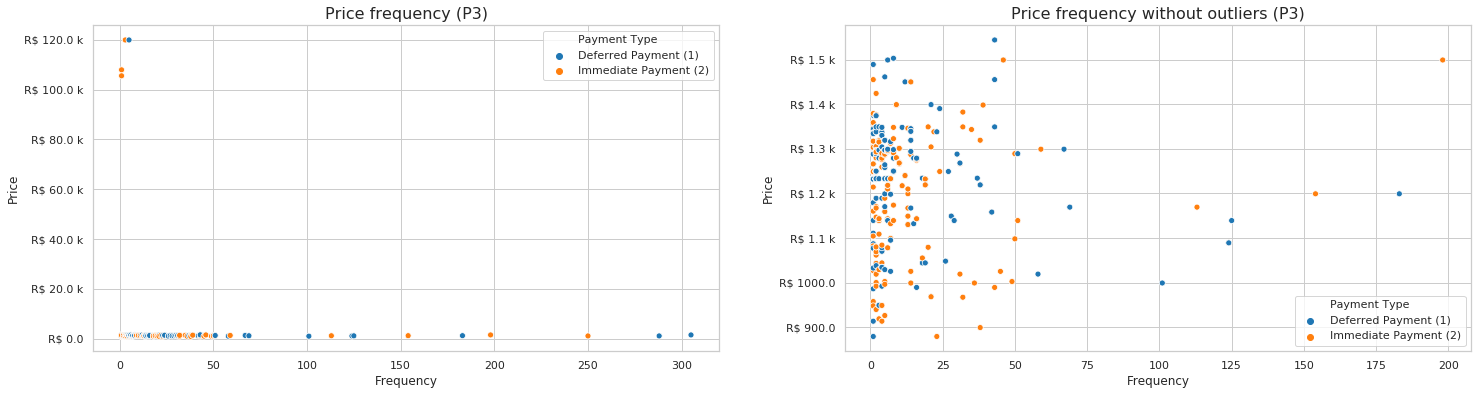

In [783]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P3'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P3)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 100000) & (qt_price['Frequency'] < 200)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P3)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- A distribuição dos preços das vendas estão bem equalizadas, assim como os outros produtos. Seus percentuais estão em 53% para compras para pagamento à vista e 47% para compras parceladas.
- Podemos analisar alguns outliers no primeiro gráfico, que estão em torno de 110 mil à 122 mil. Ao remover-mos eles, olhamos para o segundo gráfico e temos uma melhor visualização dos dados, onde nos mostra um agrupamento forte de pontos entre 1 e 50, que significa que grande parte dos clientes estão gastando entre 850 à 1500 por compra.

### 16. P4

In [697]:
df_comp_p4 = df_comp[df_comp.PROD_ID == 'P4']
df_comp_p4.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
44898,P4,2015-06-18 08:11:39,C6,499.0,1,2015-06-18,2015,6,18,3
44899,P4,2015-06-18 08:11:39,C4,569.0,1,2015-06-18,2015,6,18,3
44900,P4,2015-06-16 20:10:25,C4,569.0,2,2015-06-16,2015,6,16,1
44901,P4,2015-06-16 20:10:25,C6,499.0,2,2015-06-16,2015,6,16,1
44902,P4,2015-06-16 20:10:08,C4,569.0,1,2015-06-16,2015,6,16,1
44903,P4,2015-08-11 08:10:22,C4,569.0,2,2015-08-11,2015,8,11,1
44904,P4,2015-08-11 08:11:24,C4,569.0,1,2015-08-11,2015,8,11,1
44905,P4,2015-08-11 08:11:24,C6,548.0,1,2015-08-11,2015,8,11,1
44906,P4,2015-08-11 08:10:22,C4,569.0,1,2015-08-11,2015,8,11,1
44907,P4,2015-08-14 08:11:26,C4,499.9,2,2015-08-14,2015,8,14,4


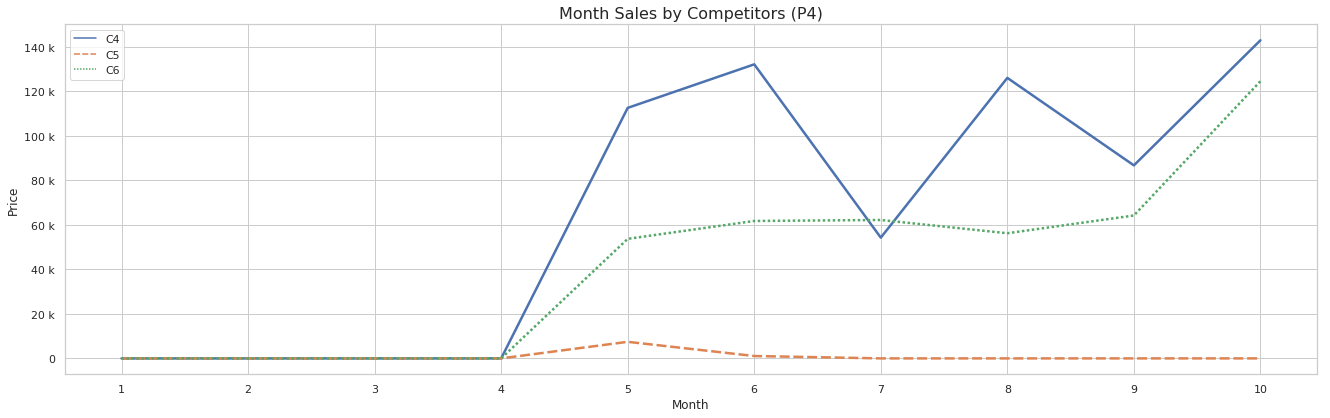

In [690]:
sales_by_comp_month = df_comp_p4.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P4)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- No gráfico acima podemos ver todas as vendas começarem a partir do mês abril e uma curva com grandes variações para o concorrente C4.
- O concorrente C6 tem um crescimento no início do mês de abirl e a partir de maio até agosto possue pequenas variações. Ao chegar em setembro as suas vendas aumentam novamente.
- O concorrente C5 possue um pequeno aumento em suas vendas na metade do mês de abril até início de maio e após isso tem uma queda em suas vendas e ficam constantes ao longo do tempo.

      Price           Payment Type  Frequency
0   49700.0  Immediate Payment (2)          1
9   49700.0   Deferred Payment (1)          1
2   46990.0   Deferred Payment (1)          1
1   46990.0  Immediate Payment (2)          1
51    655.0   Deferred Payment (1)         33
50    655.0  Immediate Payment (2)         33
62    629.9   Deferred Payment (1)         69
61    629.9  Immediate Payment (2)         69
65    569.0  Immediate Payment (2)        189
66    569.0   Deferred Payment (1)        201

Payment Type
Deferred Payment (1)     47.761194
Immediate Payment (2)    52.238806
dtype: float64


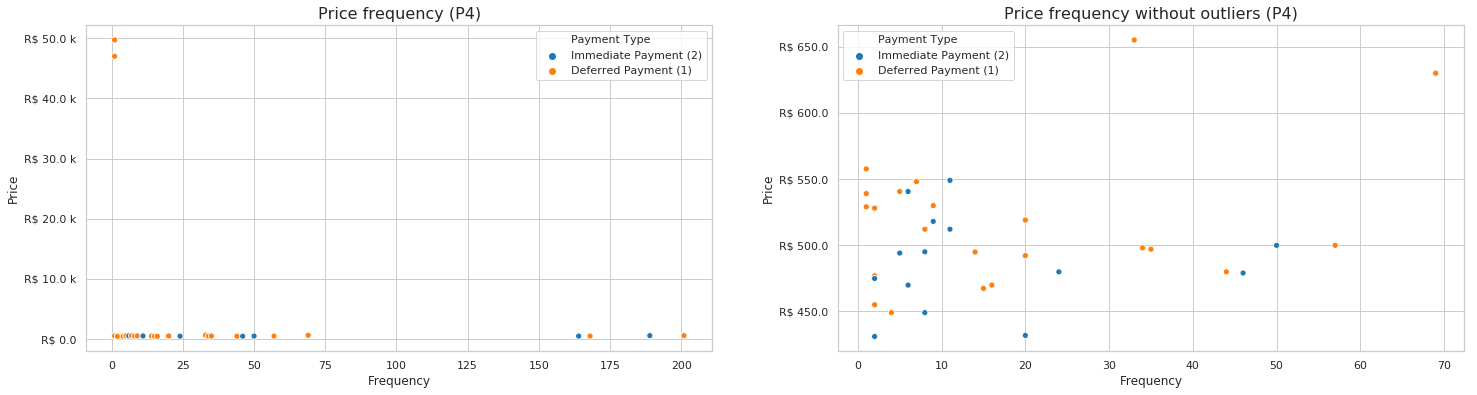

In [784]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P4'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P4)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 40000) & (qt_price['Frequency'] < 150)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P4)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- Assim como nos outros gráficos, podemos observar 4 valores distante da média de preço.
- Podemos analisar no segundo gráfico que grande parte das frequências dos preços estão entre 1 e 20.

### 17. P5

In [695]:
df_comp_p5 = df_comp[df_comp.PROD_ID == 'P5']
df_comp_p5.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
48169,P5,2015-06-18 20:10:22,C3,894.98,1,2015-06-18,2015,6,18,3
48170,P5,2015-06-18 20:10:22,C1,894.98,1,2015-06-18,2015,6,18,3
48171,P5,2015-06-18 20:10:22,C2,894.97,1,2015-06-18,2015,6,18,3
48172,P5,2015-08-11 08:11:24,C1,838.00,1,2015-08-11,2015,8,11,1
48173,P5,2015-06-16 20:10:25,C1,923.00,2,2015-06-16,2015,6,16,1
48174,P5,2015-06-16 20:10:25,C3,923.00,2,2015-06-16,2015,6,16,1
48175,P5,2015-06-16 20:10:25,C2,923.00,2,2015-06-16,2015,6,16,1
48176,P5,2015-08-11 08:11:24,C2,838.00,1,2015-08-11,2015,8,11,1
48177,P5,2015-08-11 08:11:24,C3,838.00,1,2015-08-11,2015,8,11,1
48184,P5,2015-08-11 08:11:24,C3,838.00,2,2015-08-11,2015,8,11,1


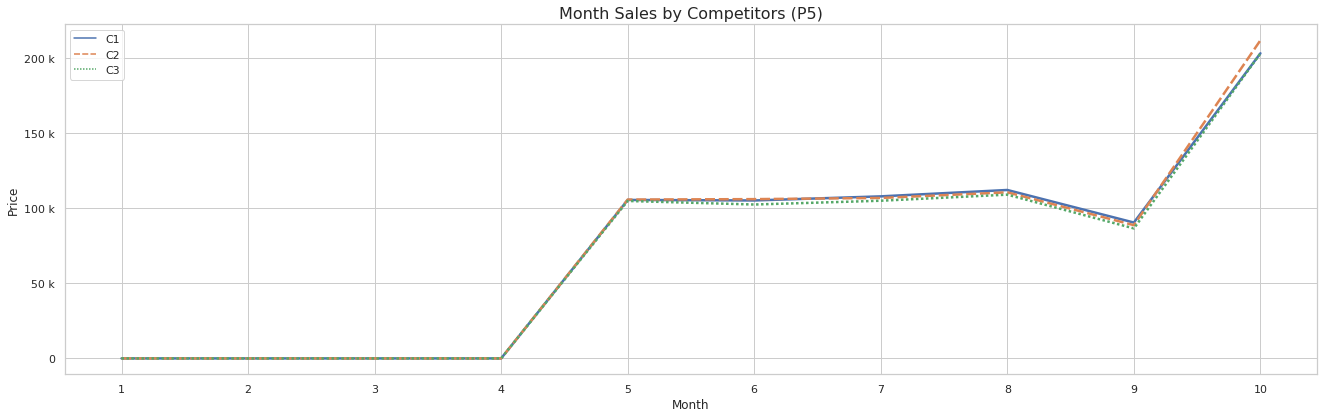

In [696]:
sales_by_comp_month = df_comp_p5.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P5)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- Ao contrário dos outros gráficos, este tem um comportamento totalmente diferente, todos os concorrentes tem vendas similares ao longo do tempo.

        Price           Payment Type  Frequency
0    84890.00  Immediate Payment (2)          1
12   84890.00   Deferred Payment (1)          1
115  81900.00  Immediate Payment (2)          2
119  81900.00   Deferred Payment (1)          2
57    1299.00   Deferred Payment (1)          1
47    1169.10  Immediate Payment (2)          1
238   1149.00  Immediate Payment (2)         10
237   1149.00   Deferred Payment (1)         10
65    1139.05   Deferred Payment (1)          1
197   1099.00   Deferred Payment (1)          5

Payment Type
Deferred Payment (1)     48.62069
Immediate Payment (2)    51.37931
dtype: float64


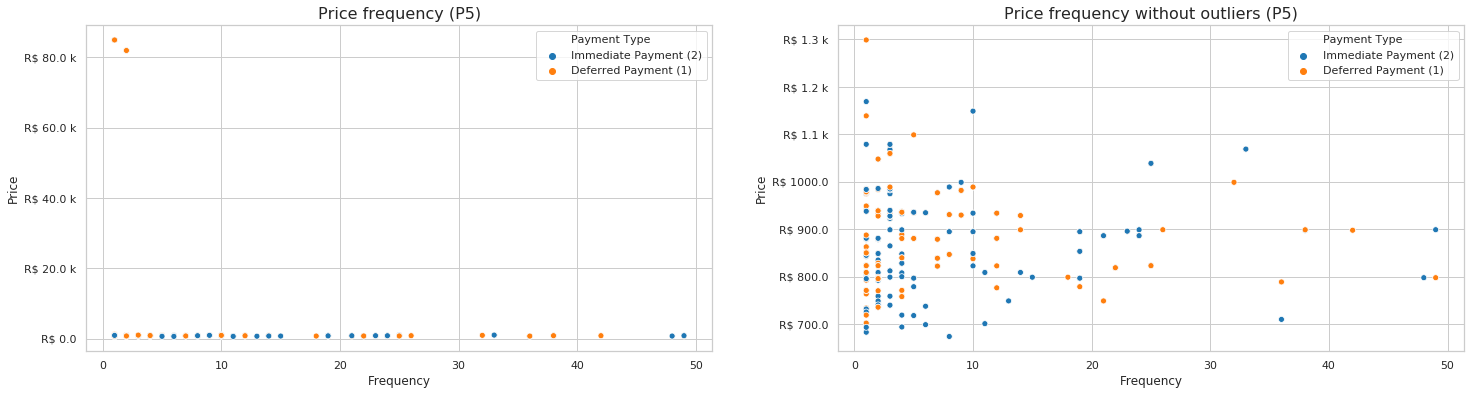

In [785]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P5'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P5)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[qt_price['Price'] < 40000], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P5)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- 51% dos dados são de pagamentos à vista e 49% para compras pareladas, podemos observar também o mesmo comportamento que os outros produtos e concorrentes, onde temos 4 valores distantes da média de preço.
- A frequência dos dados estão entre 1 e 26, que significa que grande parte dos valores das vendas para este produto estão entre 650 e 1200.

### 16. P6

In [699]:
df_comp_p6 = df_comp[df_comp.PROD_ID == 'P6']
df_comp_p6.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
0,P6,2015-01-30 08:11:38,C3,1898.00,1,2015-01-30,2015,1,30,4
1,P6,2015-01-30 08:11:38,C1,1898.00,1,2015-01-30,2015,1,30,4
2,P6,2015-01-30 08:11:38,C6,1999.90,1,2015-01-30,2015,1,30,4
3,P6,2015-01-31 20:10:14,C2,1894.88,2,2015-01-31,2015,1,31,5
4,P6,2015-01-31 20:10:14,C3,1894.88,2,2015-01-31,2015,1,31,5
5,P6,2015-01-31 20:10:14,C1,1894.88,2,2015-01-31,2015,1,31,5
6,P6,2015-01-31 20:10:14,C6,1999.90,2,2015-01-31,2015,1,31,5
7,P6,2015-01-31 20:10:05,C1,1896.62,1,2015-01-31,2015,1,31,5
8,P6,2015-01-31 20:10:05,C2,2199.00,1,2015-01-31,2015,1,31,5
9,P6,2015-01-31 20:10:05,C3,1895.98,1,2015-01-31,2015,1,31,5


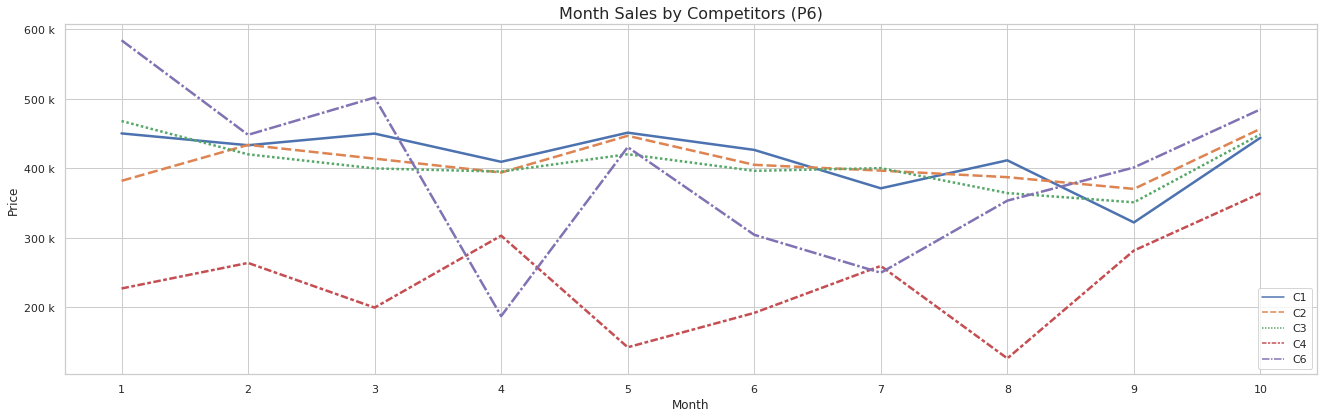

In [700]:
sales_by_comp_month = df_comp_p6.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P6)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- Os concorrentes C4 e C6 possuem grandes variações nas suas vendas ao longo do tempo.
- Os concorrentes C1, C2 e C3 possuem pequenas variações nas suas vendas ao longo do tempo.

         Price           Payment Type  Frequency
0     149900.0  Immediate Payment (2)          1
258   149900.0   Deferred Payment (1)          1
620   148000.0   Deferred Payment (1)          3
623   148000.0  Immediate Payment (2)          3
363   139900.0   Deferred Payment (1)          1
380   139900.0  Immediate Payment (2)          1
1067    2799.9   Deferred Payment (1)         23
1068    2799.9  Immediate Payment (2)         23
1019    2399.0   Deferred Payment (1)         14
1022    2399.0  Immediate Payment (2)         14

Payment Type
Deferred Payment (1)     48.686515
Immediate Payment (2)    51.313485
dtype: float64


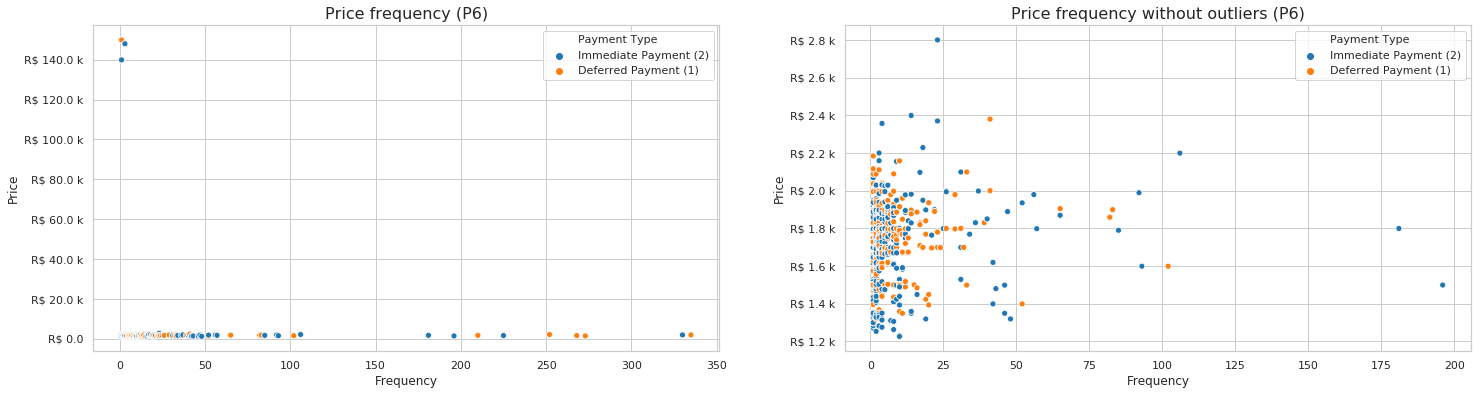

In [786]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P6'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P6)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 40000) & (qt_price['Frequency'] < 200)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P6)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- Podemos observar 6 valores distantes da média.
- Removendo-os podemos visualizar melhor os dados e ao plotarmos vemos um agrupamento forte entre 1 e 25 (frequência) e os seus preços entre 1250  à 2000.
- A distribuição de pagamentos encontram=se em 49% para pagamentos à vista e 51% para compras.

### 17. P7

In [702]:
df_comp_p7 = df_comp[df_comp.PROD_ID == 'P7']
df_comp_p7.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
9542,P7,2015-02-23 20:10:06,C4,849.00,1,2015-02-23,2015,2,23,0
9543,P7,2015-02-17 08:11:34,C6,849.00,2,2015-02-17,2015,2,17,1
9544,P7,2015-02-17 08:11:34,C4,721.65,2,2015-02-17,2015,2,17,1
9545,P7,2015-02-17 08:11:34,C1,899.05,2,2015-02-17,2015,2,17,1
9546,P7,2015-02-17 08:11:34,C3,1049.00,2,2015-02-17,2015,2,17,1
9547,P7,2015-02-17 08:10:23,C4,721.65,2,2015-02-17,2015,2,17,1
9548,P7,2015-02-17 08:10:23,C4,849.00,1,2015-02-17,2015,2,17,1
9549,P7,2015-02-12 08:11:35,C6,849.00,2,2015-02-12,2015,2,12,3
9550,P7,2015-02-12 08:11:35,C4,747.12,2,2015-02-12,2015,2,12,3
9551,P7,2015-02-12 08:11:35,C3,899.00,2,2015-02-12,2015,2,12,3


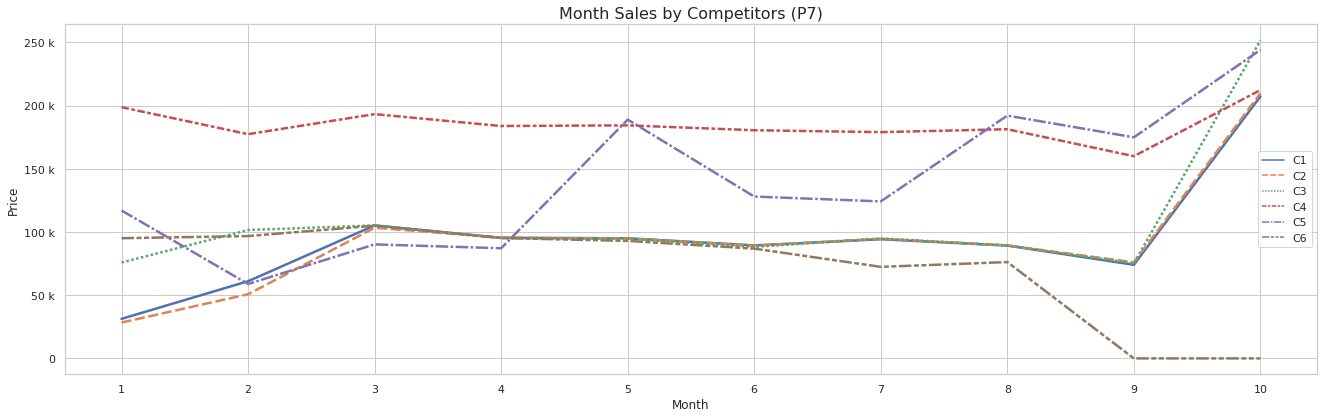

In [703]:
sales_by_comp_month = df_comp_p7.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P7)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- As vendas dos concorrentes possuem quase o mesmo comportamento, exceto o concorrente C5 e C6.
- o comportamento das vendas do concorrente C5 é crescente ao longo do tempo, porém existem diversas variações.
- Para o concorrente C6 é o inverso, as suas vendas vão decrescendo ao longo do tempo.

       Price           Payment Type  Frequency
4   104900.0   Deferred Payment (1)          1
46  104900.0  Immediate Payment (2)          1
24   86100.0   Deferred Payment (1)          1
26   84990.0   Deferred Payment (1)          1
25   84990.0  Immediate Payment (2)          1
27   84090.0  Immediate Payment (2)          1
28   84090.0   Deferred Payment (1)          1
29   77490.0  Immediate Payment (2)          1
31   69990.0   Deferred Payment (1)          1
30   69990.0  Immediate Payment (2)          1

Payment Type
Deferred Payment (1)     43.82716
Immediate Payment (2)    56.17284
dtype: float64


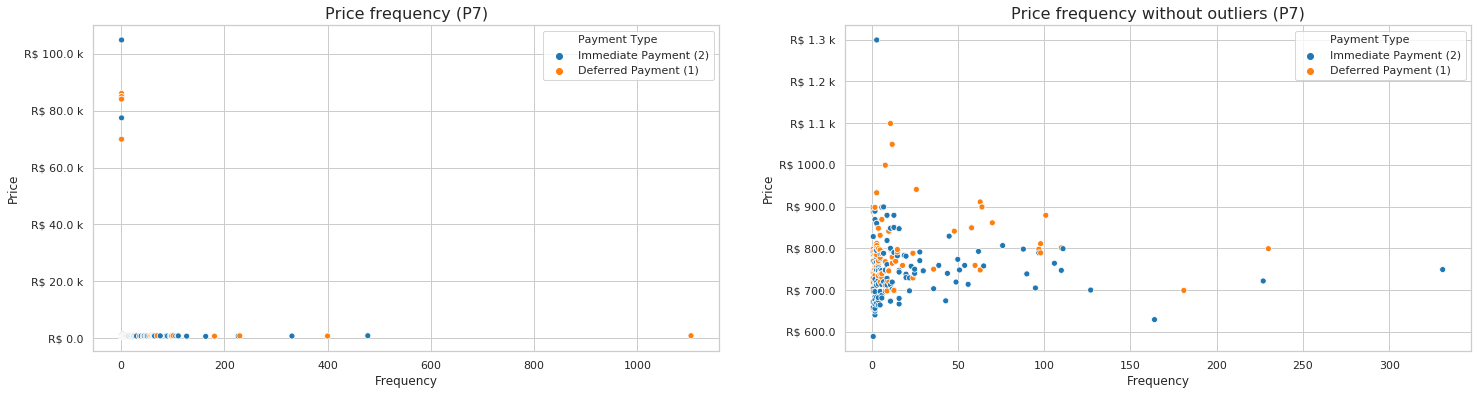

In [787]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P7'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P7)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 40000) & (qt_price['Frequency'] < 400)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P7)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- No primeiro gráfico podemos observar um grupo de valores distantes da média que encontram-se acima de 65 mil.
- Ao remove-los podemos visualizar um forte agrupamento entre a frequência de 1 à 100 e os valores de 580 à 910 mil.

### 18. P8

In [705]:
df_comp_p8 = df_comp[df_comp.PROD_ID == 'P8']
df_comp_p8.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
26698,P8,2015-06-18 08:11:39,C6,495.76,1,2015-06-18,2015,6,18,3
26699,P8,2015-06-18 08:11:39,C3,498.99,1,2015-06-18,2015,6,18,3
26700,P8,2015-06-18 08:11:39,C4,479.00,1,2015-06-18,2015,6,18,3
26701,P8,2015-06-18 08:11:39,C2,498.99,1,2015-06-18,2015,6,18,3
26702,P8,2015-06-18 08:11:39,C1,498.99,1,2015-06-18,2015,6,18,3
26703,P8,2015-06-16 20:10:25,C6,495.79,2,2015-06-16,2015,6,16,1
26704,P8,2015-06-16 20:10:25,C3,489.88,2,2015-06-16,2015,6,16,1
26705,P8,2015-06-16 20:10:25,C4,479.00,2,2015-06-16,2015,6,16,1
26706,P8,2015-06-16 20:10:25,C2,498.99,2,2015-06-16,2015,6,16,1
26707,P8,2015-06-16 20:10:25,C1,498.99,2,2015-06-16,2015,6,16,1


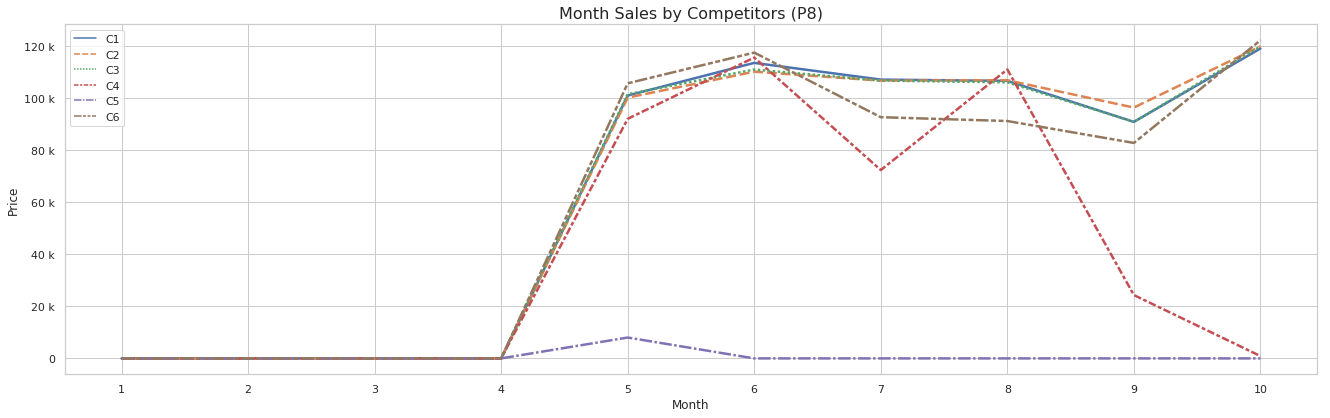

In [706]:
sales_by_comp_month = df_comp_p8.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P8)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- Todas as vendas para este produto começa a partir de abril, os concorrentes C1, C2, e C6 possuem comportamentos parecidos.
- O concorrente C4 tem uma grande venda em abril e no início de maio um aumento mais devagar, após este período podemos observar algumas varições e uma queda muito grande a partir do mês de agosto.

        Price           Payment Type  Frequency
169  39999.00  Immediate Payment (2)          1
17   39999.00   Deferred Payment (1)          1
352  39300.00  Immediate Payment (2)          3
349  39300.00   Deferred Payment (1)          3
299    636.00   Deferred Payment (1)          2
586    599.00  Immediate Payment (2)         16
612    599.00   Deferred Payment (1)         38
296    559.68  Immediate Payment (2)          2
587    539.10  Immediate Payment (2)         17
107    537.00  Immediate Payment (2)          1

Payment Type
Deferred Payment (1)     49.082569
Immediate Payment (2)    50.917431
dtype: float64


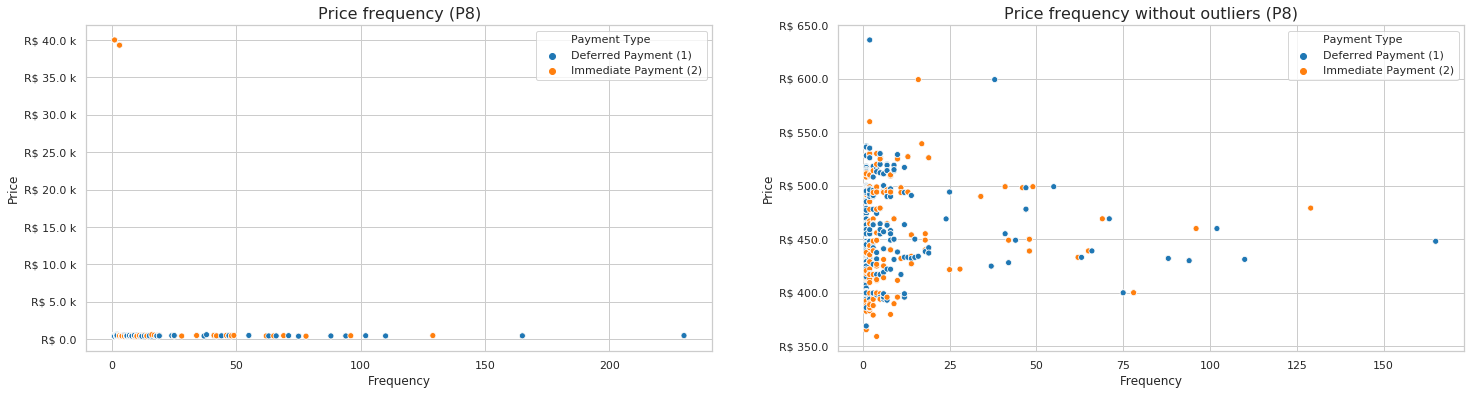

In [788]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P8'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P8)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type', 
    palette='tab10', 
    data=qt_price[(qt_price['Price'] < 30000) & (qt_price['Frequency'] < 200)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P8)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- No primero gráfico podemos observar alguns outliers que tem os seus valores em torno de 39.300 e 40.000.
- Ao remove-los podemos observar um forte agrupamento nas frequências entre 1 e 25 e os seus valores entre 360 e 550.

### 19. P9

In [709]:
df_comp_p9 = df_comp[df_comp.PROD_ID == 'P9']
df_comp_p9.head(10)

,PROD_ID,DATE_EXTRACTION,COMPETITOR,COMPETITOR_PRICE,PAY_TYPE,DATE,YEAR,MONTH,DAY,WEEKDAY
33508,P9,2015-06-18 08:11:39,C2,478.90,1,2015-06-18,2015,6,18,3
33509,P9,2015-06-18 08:11:39,C6,491.76,1,2015-06-18,2015,6,18,3
33510,P9,2015-06-18 08:11:39,C1,478.90,1,2015-06-18,2015,6,18,3
33511,P9,2015-06-18 08:11:39,C5,599.00,1,2015-06-18,2015,6,18,3
33512,P9,2015-06-18 08:11:39,C3,510.99,1,2015-06-18,2015,6,18,3
33513,P9,2015-06-16 20:10:08,C3,512.99,1,2015-06-16,2015,6,16,1
33514,P9,2015-06-16 20:10:08,C6,491.79,1,2015-06-16,2015,6,16,1
33515,P9,2015-06-16 20:10:08,C1,498.99,1,2015-06-16,2015,6,16,1
33516,P9,2015-06-16 20:10:08,C2,489.88,1,2015-06-16,2015,6,16,1
33517,P9,2015-06-16 20:10:25,C1,512.99,2,2015-06-16,2015,6,16,1


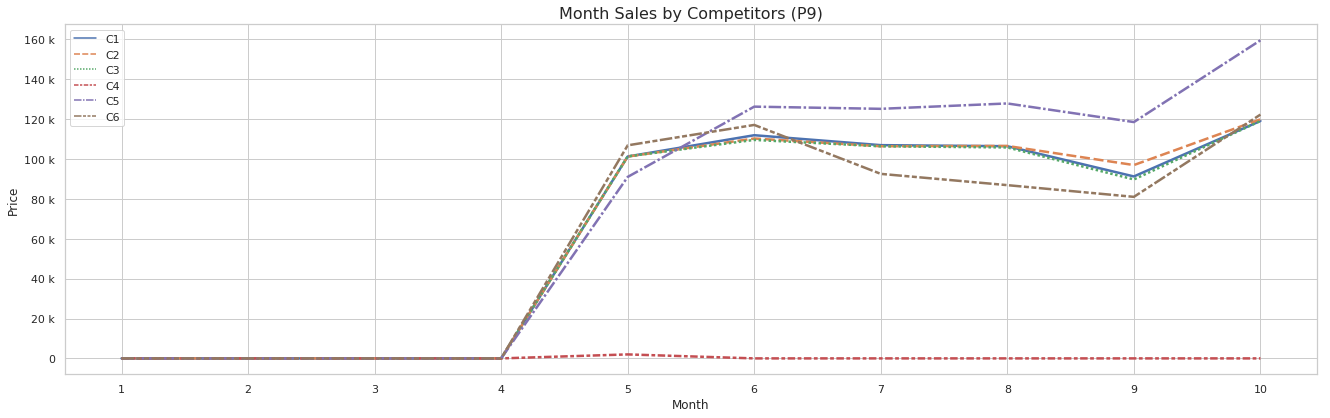

In [710]:
sales_by_comp_month = df_comp_p9.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P9)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- O comportamento do produto P9 é bem parecido com o produto P8, porém o que muda são os comportamentos dos concorrentes.
- No gráfico podemos visualizar que o concorrente C4 não possui praticamente nenhuma venda para este produto, enquanto outros um alto crescimento nas vendas a partir do mês de abril e tendo poucas varições ao longo do tempo.

        Price           Payment Type  Frequency
0    56900.00   Deferred Payment (1)          1
153  50072.00  Immediate Payment (2)          1
120  39999.00   Deferred Payment (1)          1
162  39999.00  Immediate Payment (2)          1
304  39300.00   Deferred Payment (1)          3
301  39300.00  Immediate Payment (2)          3
246    636.00   Deferred Payment (1)          2
617    599.00   Deferred Payment (1)        293
560    579.00   Deferred Payment (1)         25
535    569.05  Immediate Payment (2)         16

Payment Type
Deferred Payment (1)     48.867314
Immediate Payment (2)    51.132686
dtype: float64


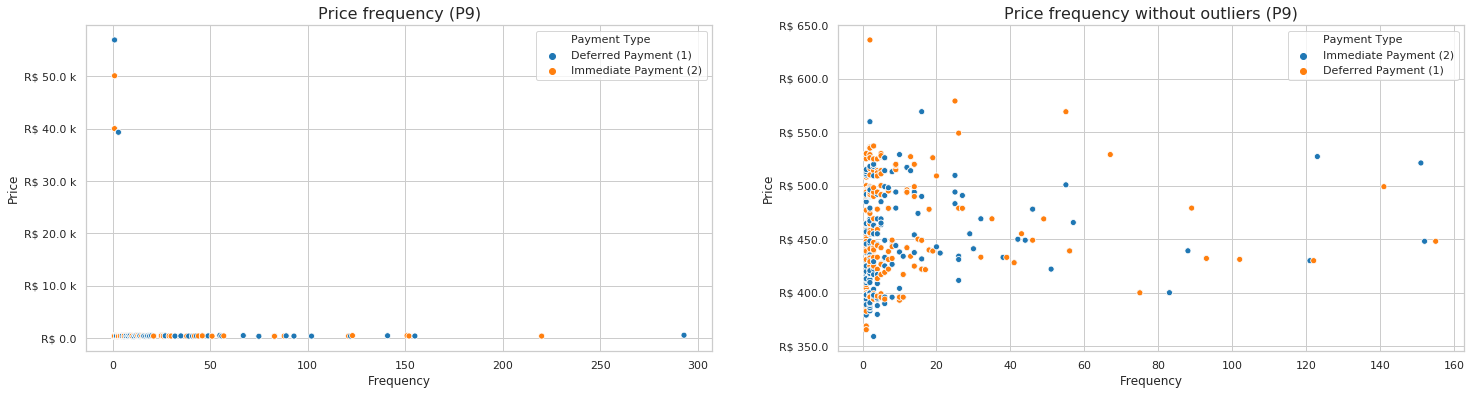

In [789]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P9'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type', 
    palette='tab10', 
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P9)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type', 
    palette='tab10', 
    data=qt_price[(qt_price['Price'] < 30000) & (qt_price['Frequency'] < 200)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P9)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- Conforme apresentado no primeiro gráfico, podemos observar alguns outliers que estão variando entre 39.300 à 56.900.
- No segundo gráfico podemos visualizar um agrupamento forte da frequência entre 1 e 20 e os seus valores entre 360 à 540.